# Topic 4 -- Neural Networks

As we move on to using larger, more complex datasets, we soon run into an issue -- traditional linear and logistic regression is no longer sufficient to learn from those datasets. One might suggest to add a few extra features, like we did with polynomial regression, however when working with complex datasets already with many features, `PolynomialFeatures` would simply be too much and slow down computation dramatically.

Neural networks are state-of-the-art ML architectures derived from the humble logistic regression, and due to its "deep" nature, it is able to solve some of the most complex ML problems, kicking off the era of **Deep Learning**. In this notebook, you are going to learn about the structure of a neural network, as well as various other activation functions which together allow a neural network to learn much more complicated hypothesis functions.

## Table of Contents

1. [Installing Dependencies](#installing)


2. [Logistic Regression vs Neural Networks](#lvn)
    - [Neuron Representation of Logistic Regression](#neuronrep)
    - [Stacking Logistic Regression Units](#stacking)


3. [Neural Networks](#nn)
    - [Layers](#termin)
    - [Activation Function](#act)
    - [Why do we need an Activation Function](#why)
    

4. [How Neural Networks Learn](#learn)
    - [Forward Propagation](#forward)
    - [Calculating Cost](#cost)
    - [Back Propagation](#backprop)
    - [Update all $w$ and $b$](#update)
    
    
5. [Neural Network Applications](#applications)
    - [Multi-class Classification](#mclass)
    - [Multi-task Classification](#mtask)
    
    
6. [Neural Networks In Action](#action)
    - [Creating the Ultimate Candy](#candy)
    - [Visualizing the Dataset](#dataset)
    - [Training the Neural Network](#training)
    - [How Accuracy is Calculated in SKLearn](#acc)
    - [Other Metrics](#other)
    - [Conclusions](#conclusions)


## Installing Dependencies <a name="installing">
    
Before we begin, we first need to install some modules we are going to use in this notebook. Here is a brief description of the modules:

- **Numpy**: A powerful linear algebra library.
- **Pandas**: Used to organize our dataset.
- **SKLearn**: A highly abstract machine learning library.
- **MatPlotLib**, **SeaBorn**, and **Bokeh**: Data visualization libraries for plotting our dataset.
- **utils.py**: A custom module used to display graphics used in this notebook

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sn
from bokeh.plotting import figure, show, output_notebook
from utils import *

## Logistic Regression vs Neural Networks <a name="lvn">
    
You've all seen Logistic Regression -- It consists of performing a **linear sum** and then feeding the sum into a **sigmoid** function, which gives you the output (then there is the whole gradient calculation process that updates the parameters). Believe it or not, Neural Networks are very similar. In fact, **a Neural Network is a bunch of Logistic Regression units stacked on top of one another**. To understand how it works, we need to look at the **"Neuron Representation" of Logistic Regression**.

### Neuron Representation of Logistic Regression <a name="neuronrep">
    
In the image below, we represent Logistic Regression as a connection of "Neurons":
    
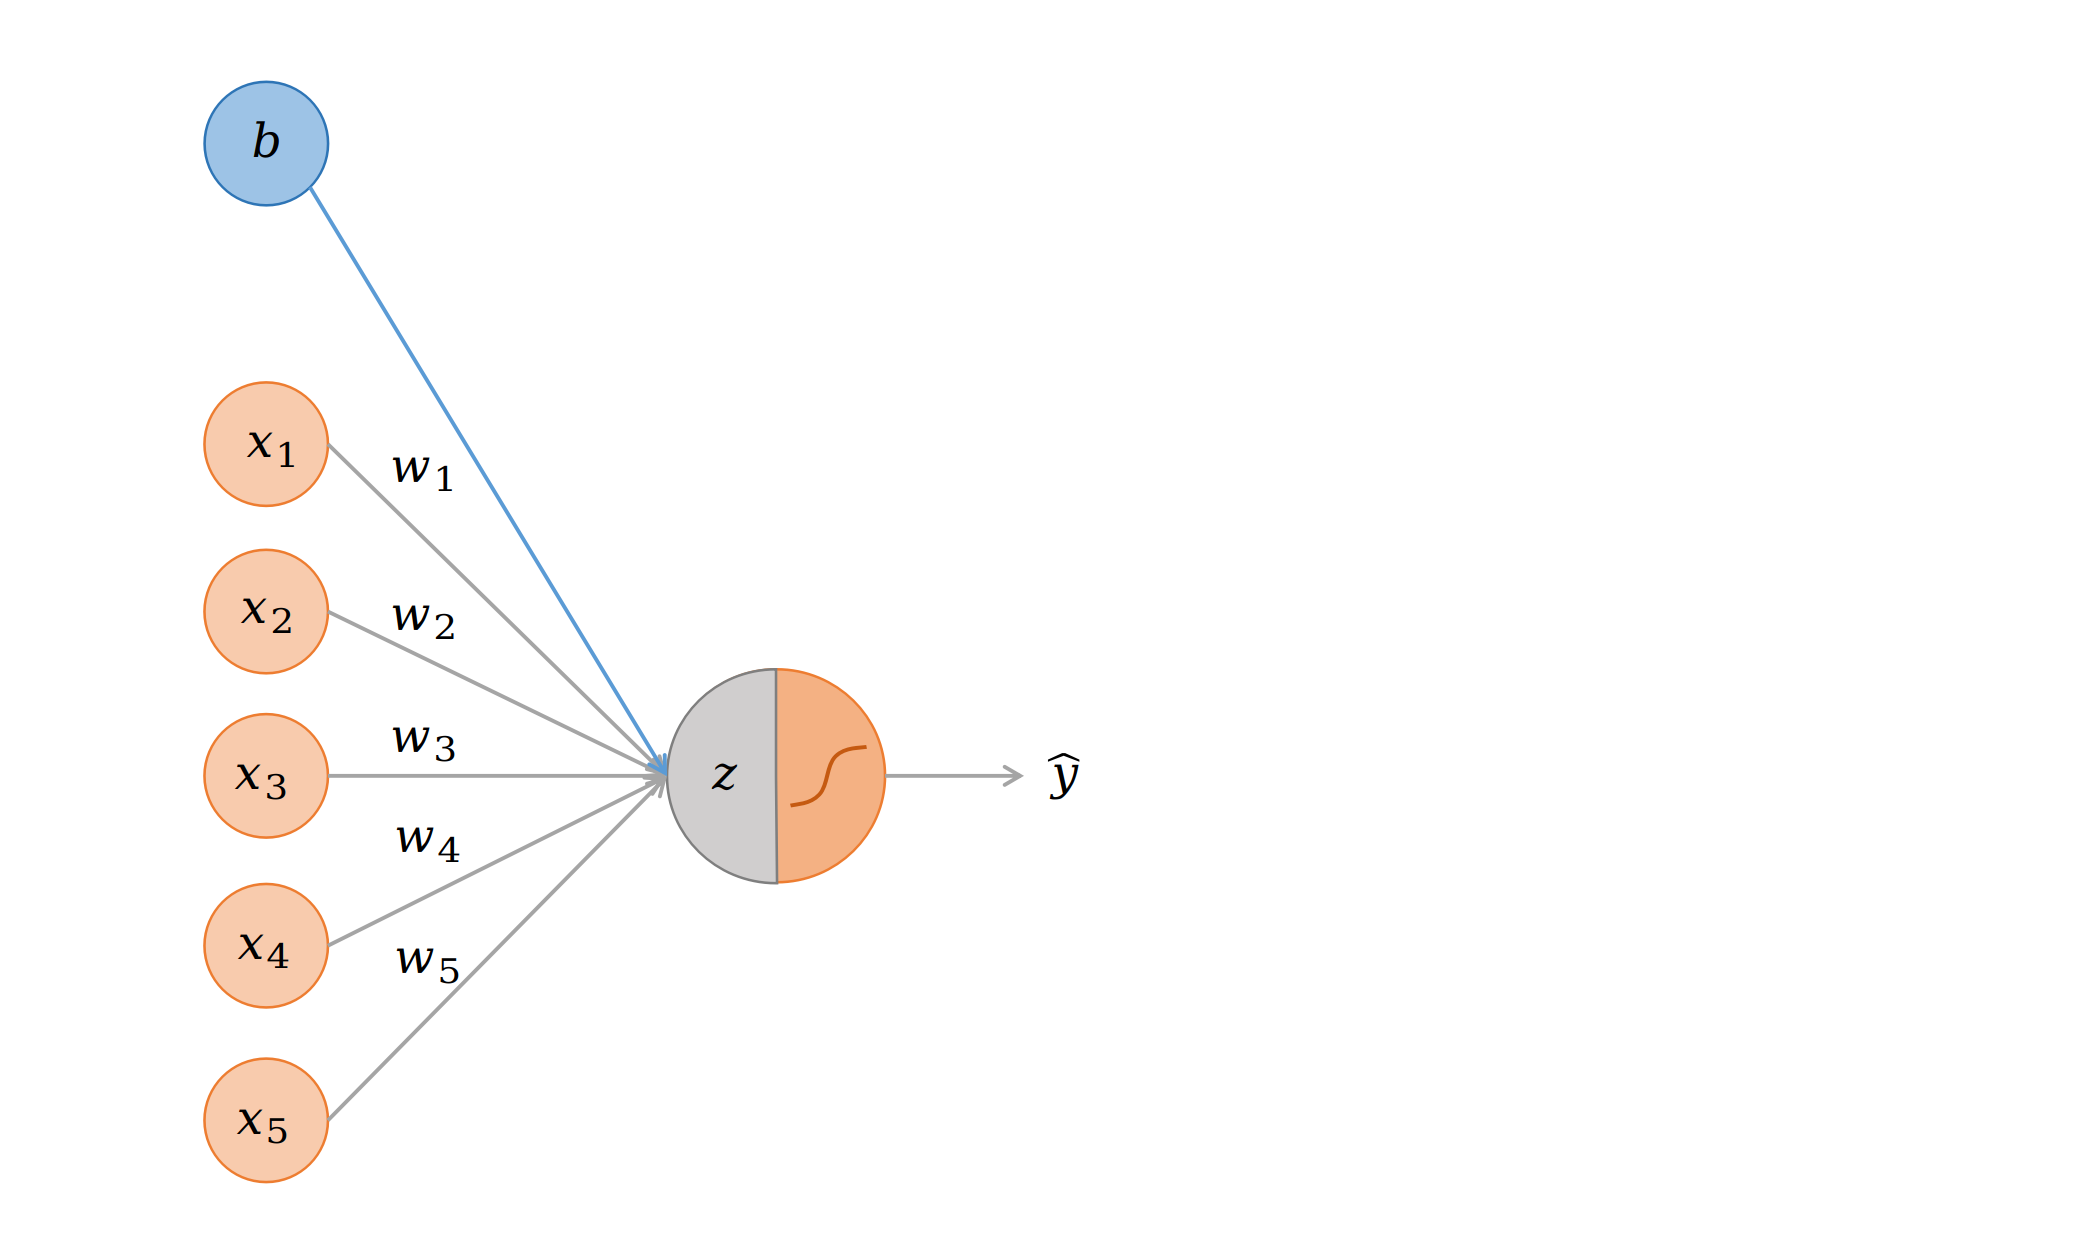
    
Here you can see that each of the inputs $x_1, x_2, ..., x_5$ are represented by its own neuron, and the weight parameters $w_1, ..., w_5$ represents **how strong** the connection of each input is. All of the weighted inputs are summed up to form the weighted sum $z$, which is then fed through the sigmoid function to produce the output $\hat{y}$
    
    
In Topic 2, we discussed about multiclass classification, where we are essentially training **multiple** Logistic Regression classifiers, each one to predict on a certain **class**. Here we show three classifiers used to predict on **orcas, ostriches, and deer**.
    
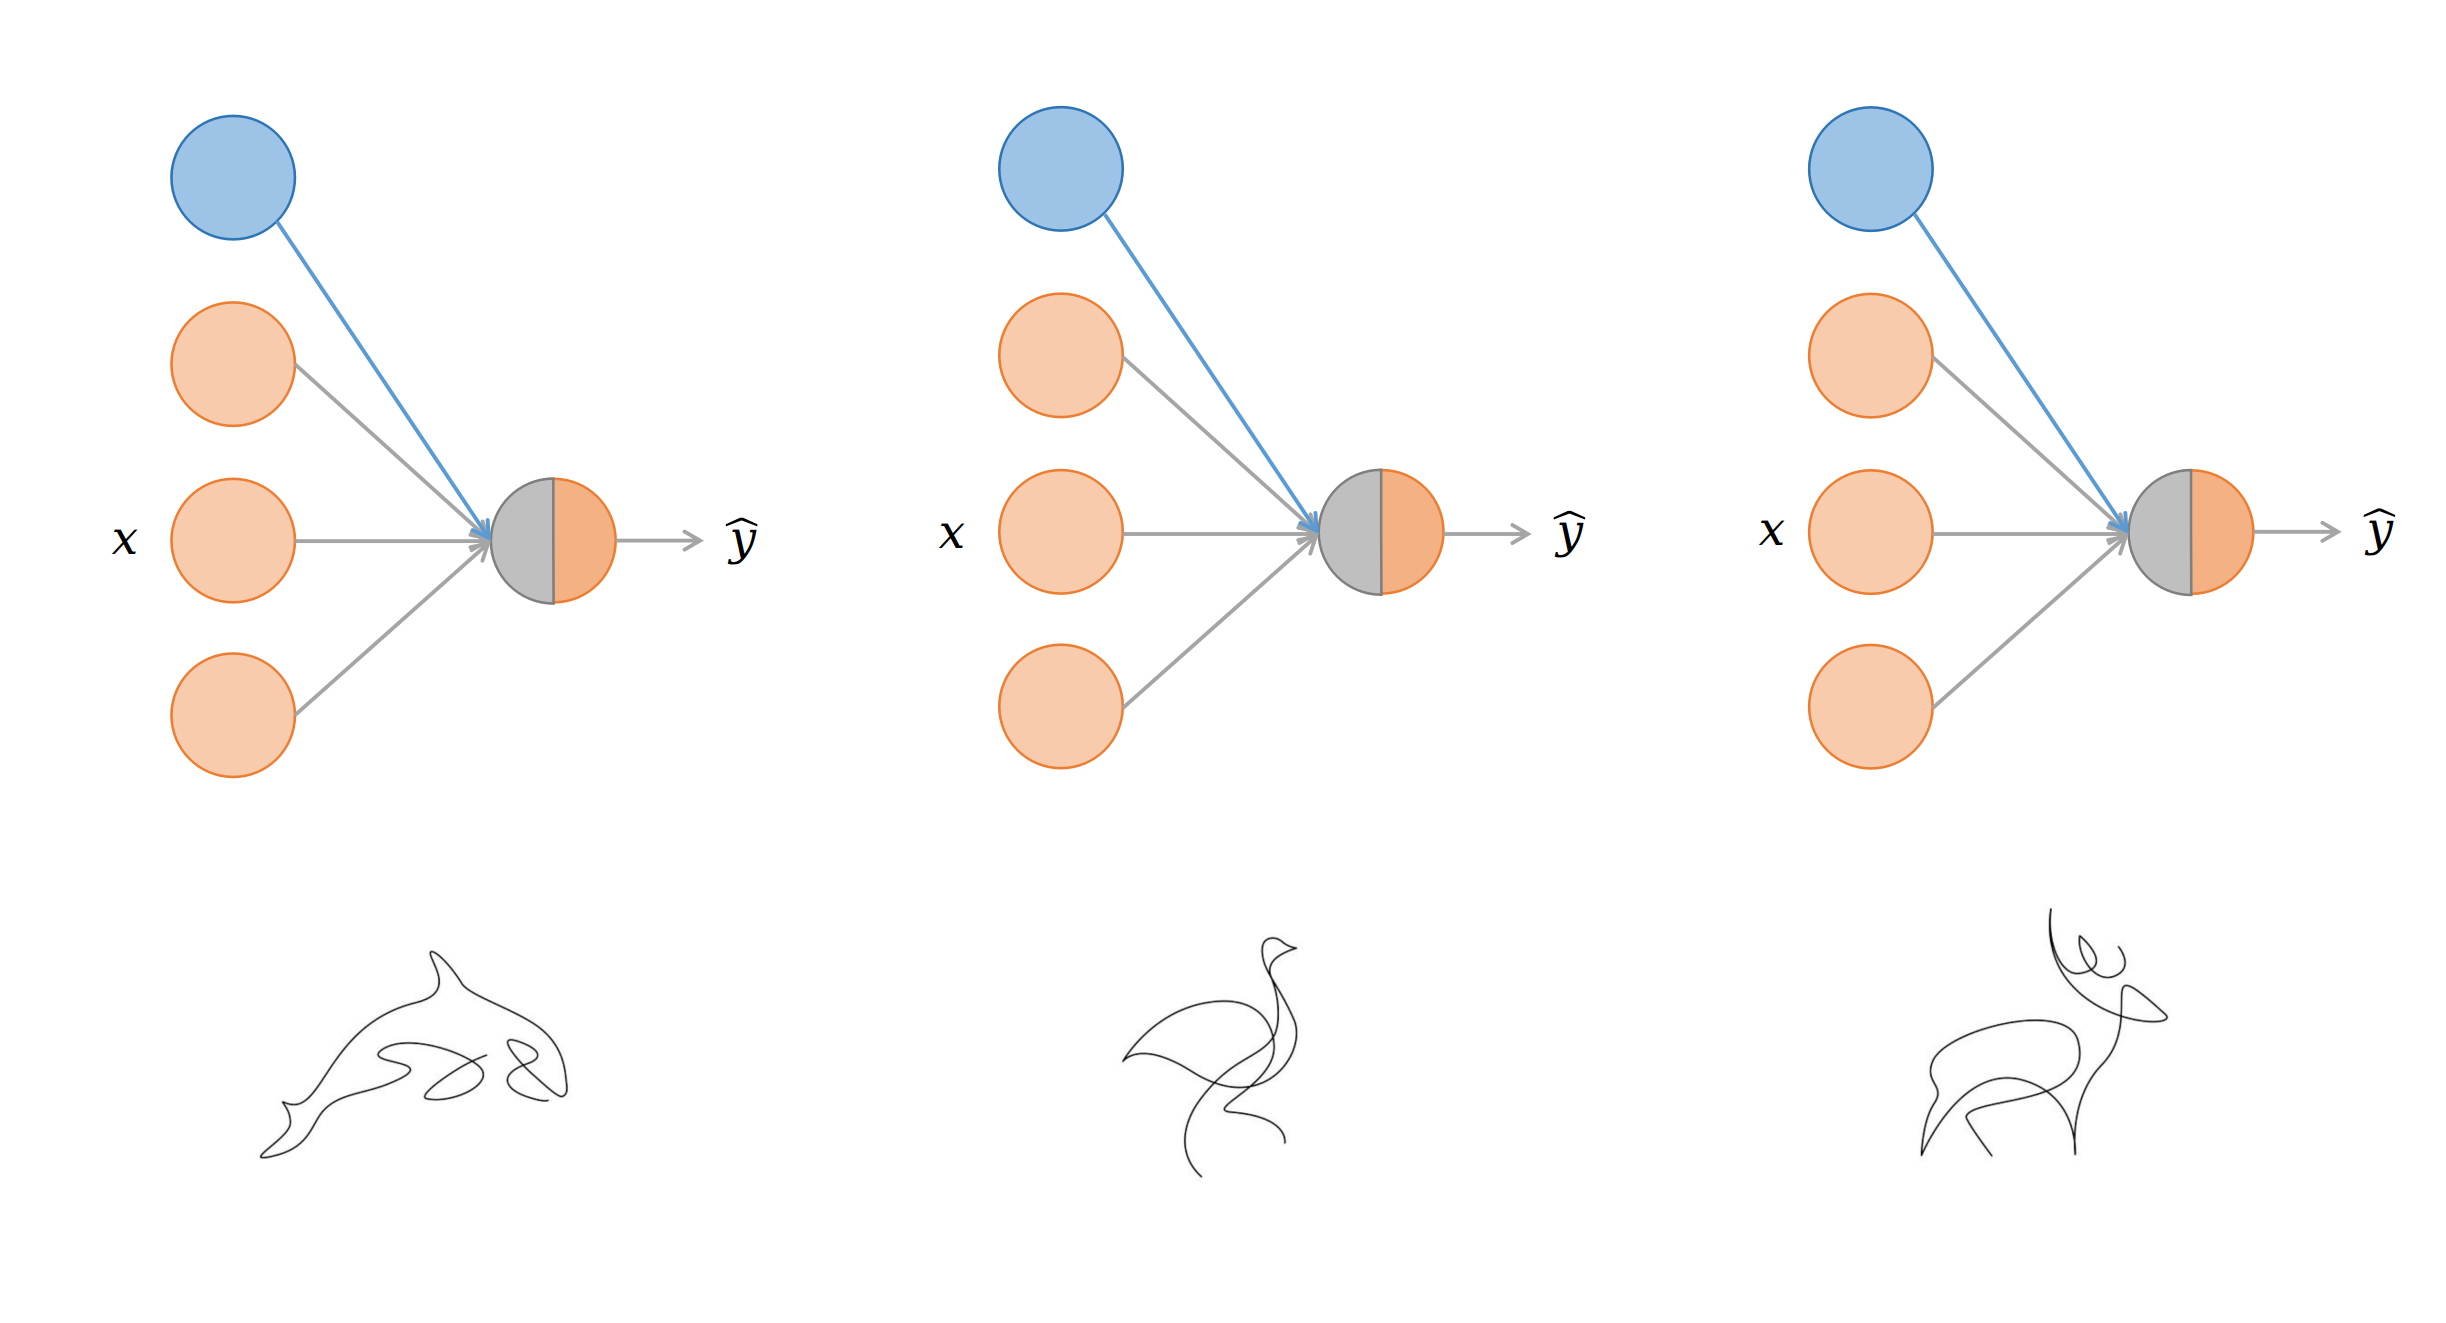
    
Notice that these three models can be simplified a little -- since they share the same input (you can feed the same image of an orca into all of these classifiers, and one of them will output a 1), you can merge the three models into **one model** with **three outputs**:
    
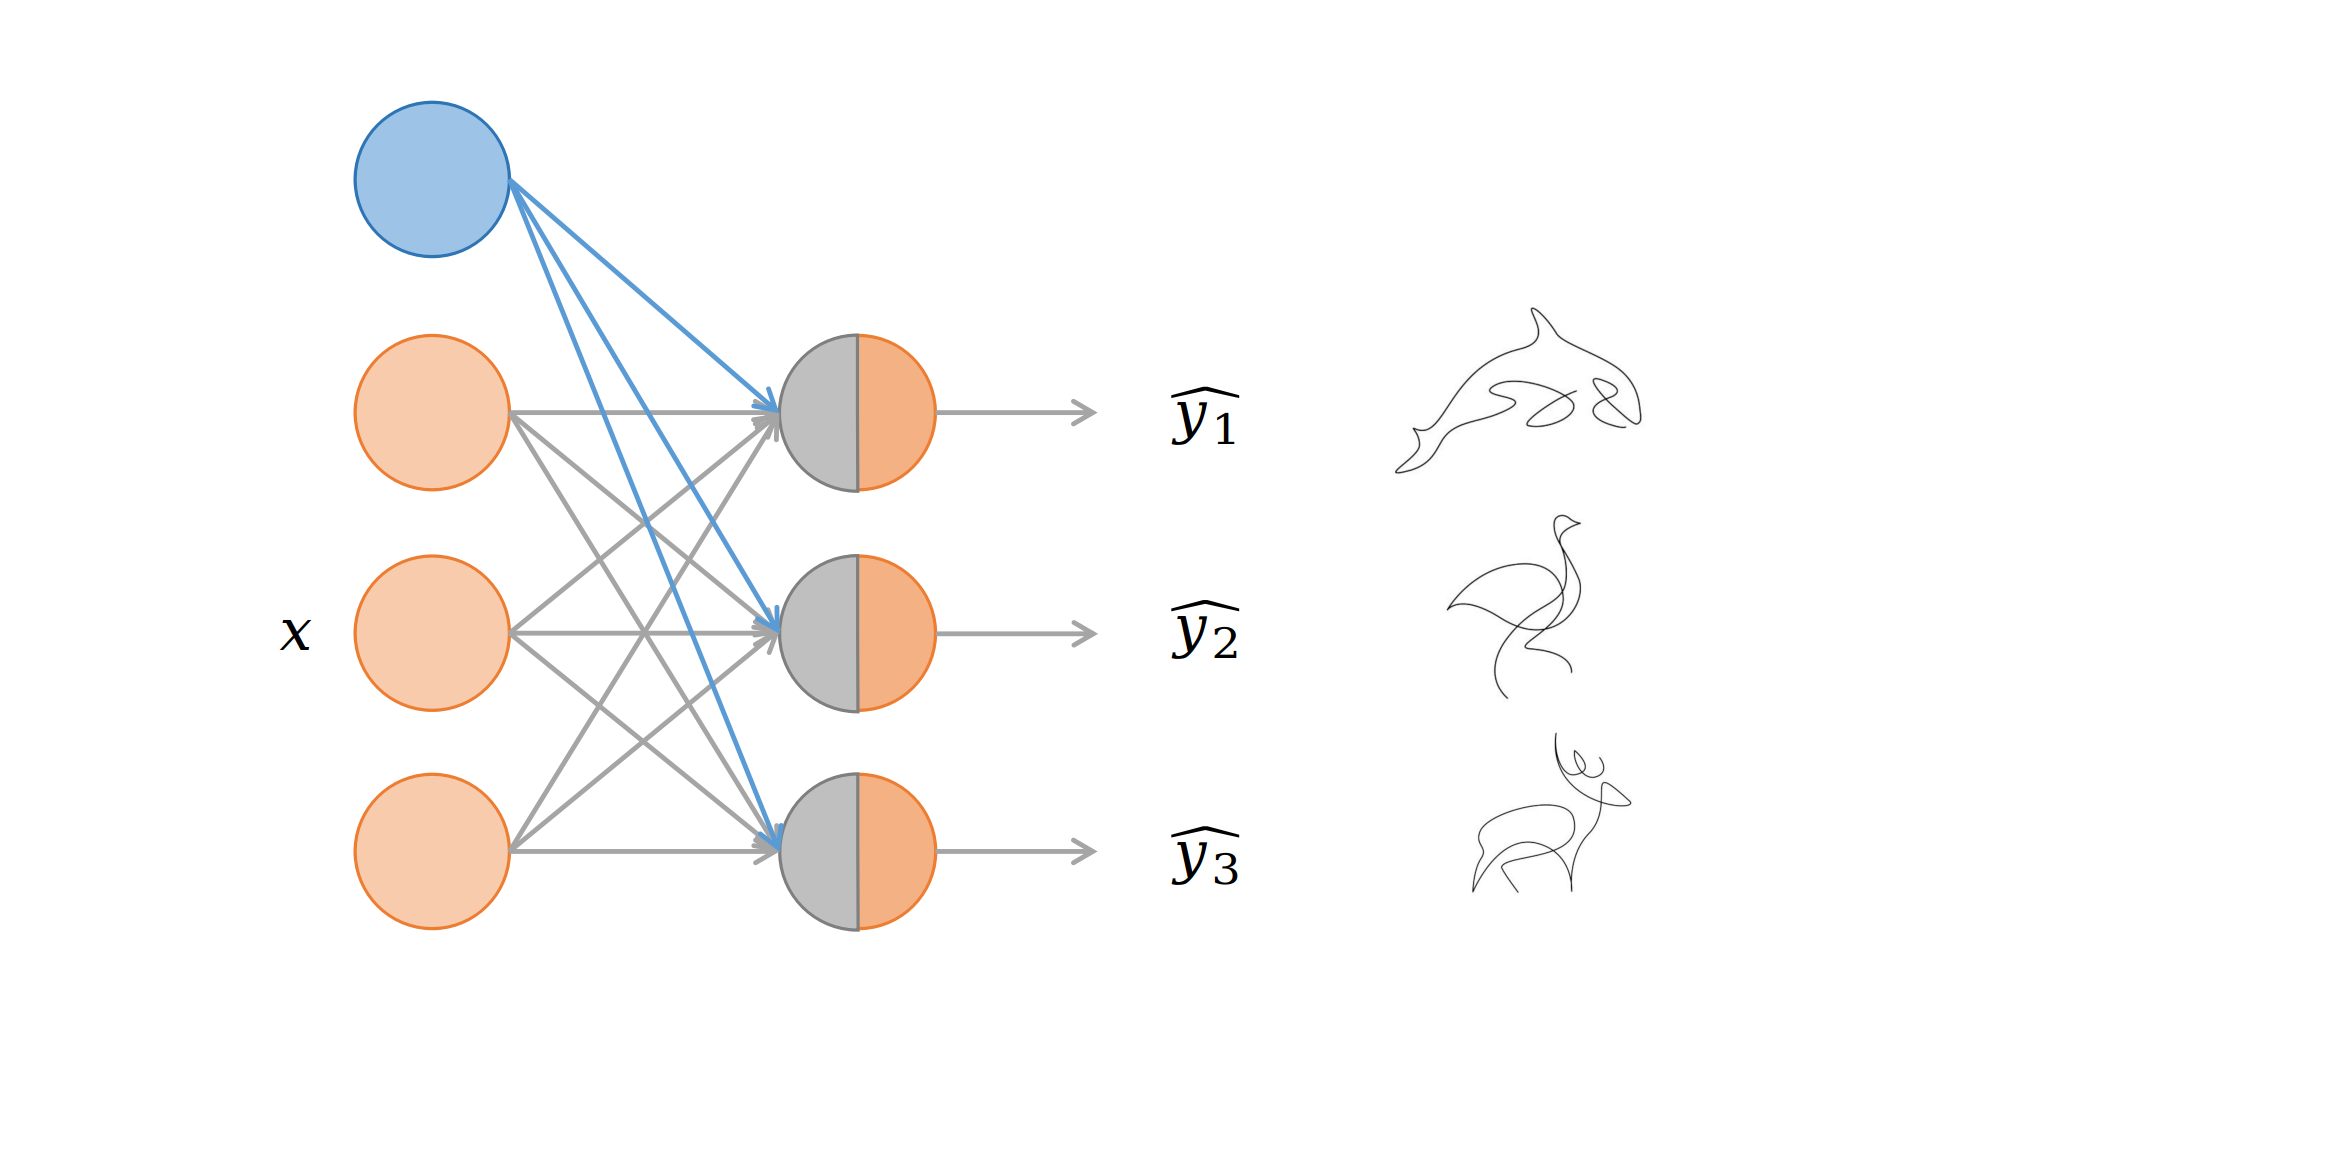

### Stacking Logistic Regression Units <a name="stacking">
    
So far, we know that Logistic Regression is able to learn from the **input data** to make predictions. *What if we are able to train a Logistic Regression model that learns from the output of another Logistic Regression model?* In other words, *what if we use the output of one Logistic Regression model as the input of another one?*

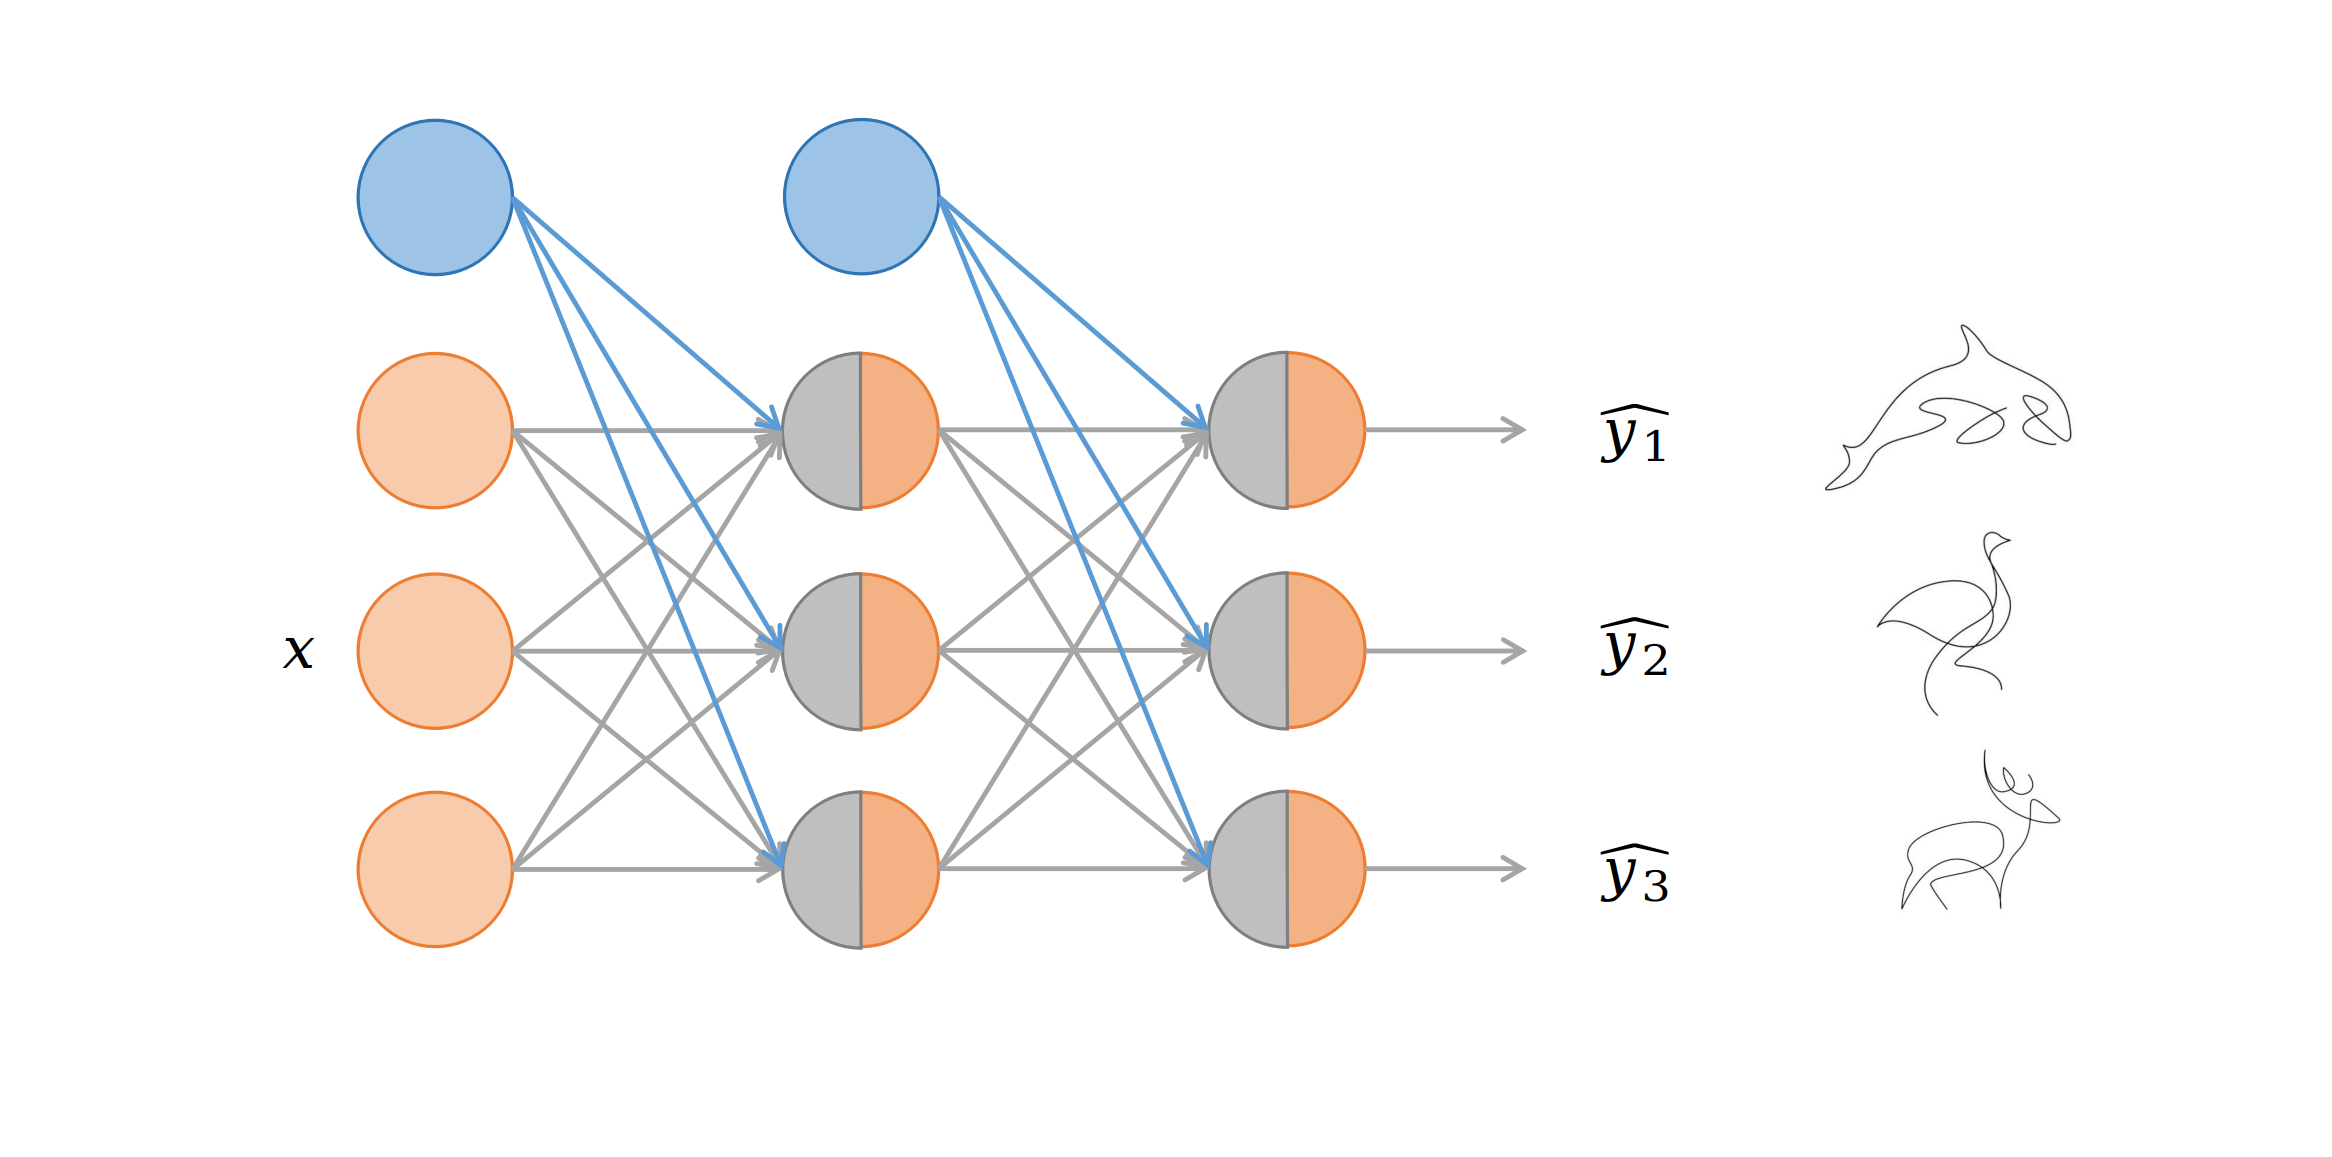
    
This forms the concept of a **Neural Network**. Each layer in a Neural Network is a Logistic Regression Unit that is learning the output of the previous layer! Because you are chaining together multiple Logistic Regression units, a Neural Network is able to learn hypothesis functions that are far more complex than a single Logistic Regression unit can.
    
---

## Neural Networks <a name="nn">

### Layers <a name="layers">
    
Neural Networks can come in all shapes and sizes -- particularly, we can talk about the **number of layers** in a neural network, as well as the **number of neurons in each layer**. When we count the number of layers in a Neural Network, we count all BUT the input layer. For example, the picture you see above is a **two-layer neural network**. Just a side note, Logistic Regression models are also Neural Networks -- albeit with only one layer.
    
A bit ago we mentioned about the "deep" nature of a Neural Network. The **depth** of a neural network refers to the number of layers in a network. We've found that deeper networks are able to solve more complicated problems such as Natural Language Processing and Computer Vision.
    
There are three main types of layers in a Neural Network: the **input** layer, the **hidden** layers, and the **output** layer:
    
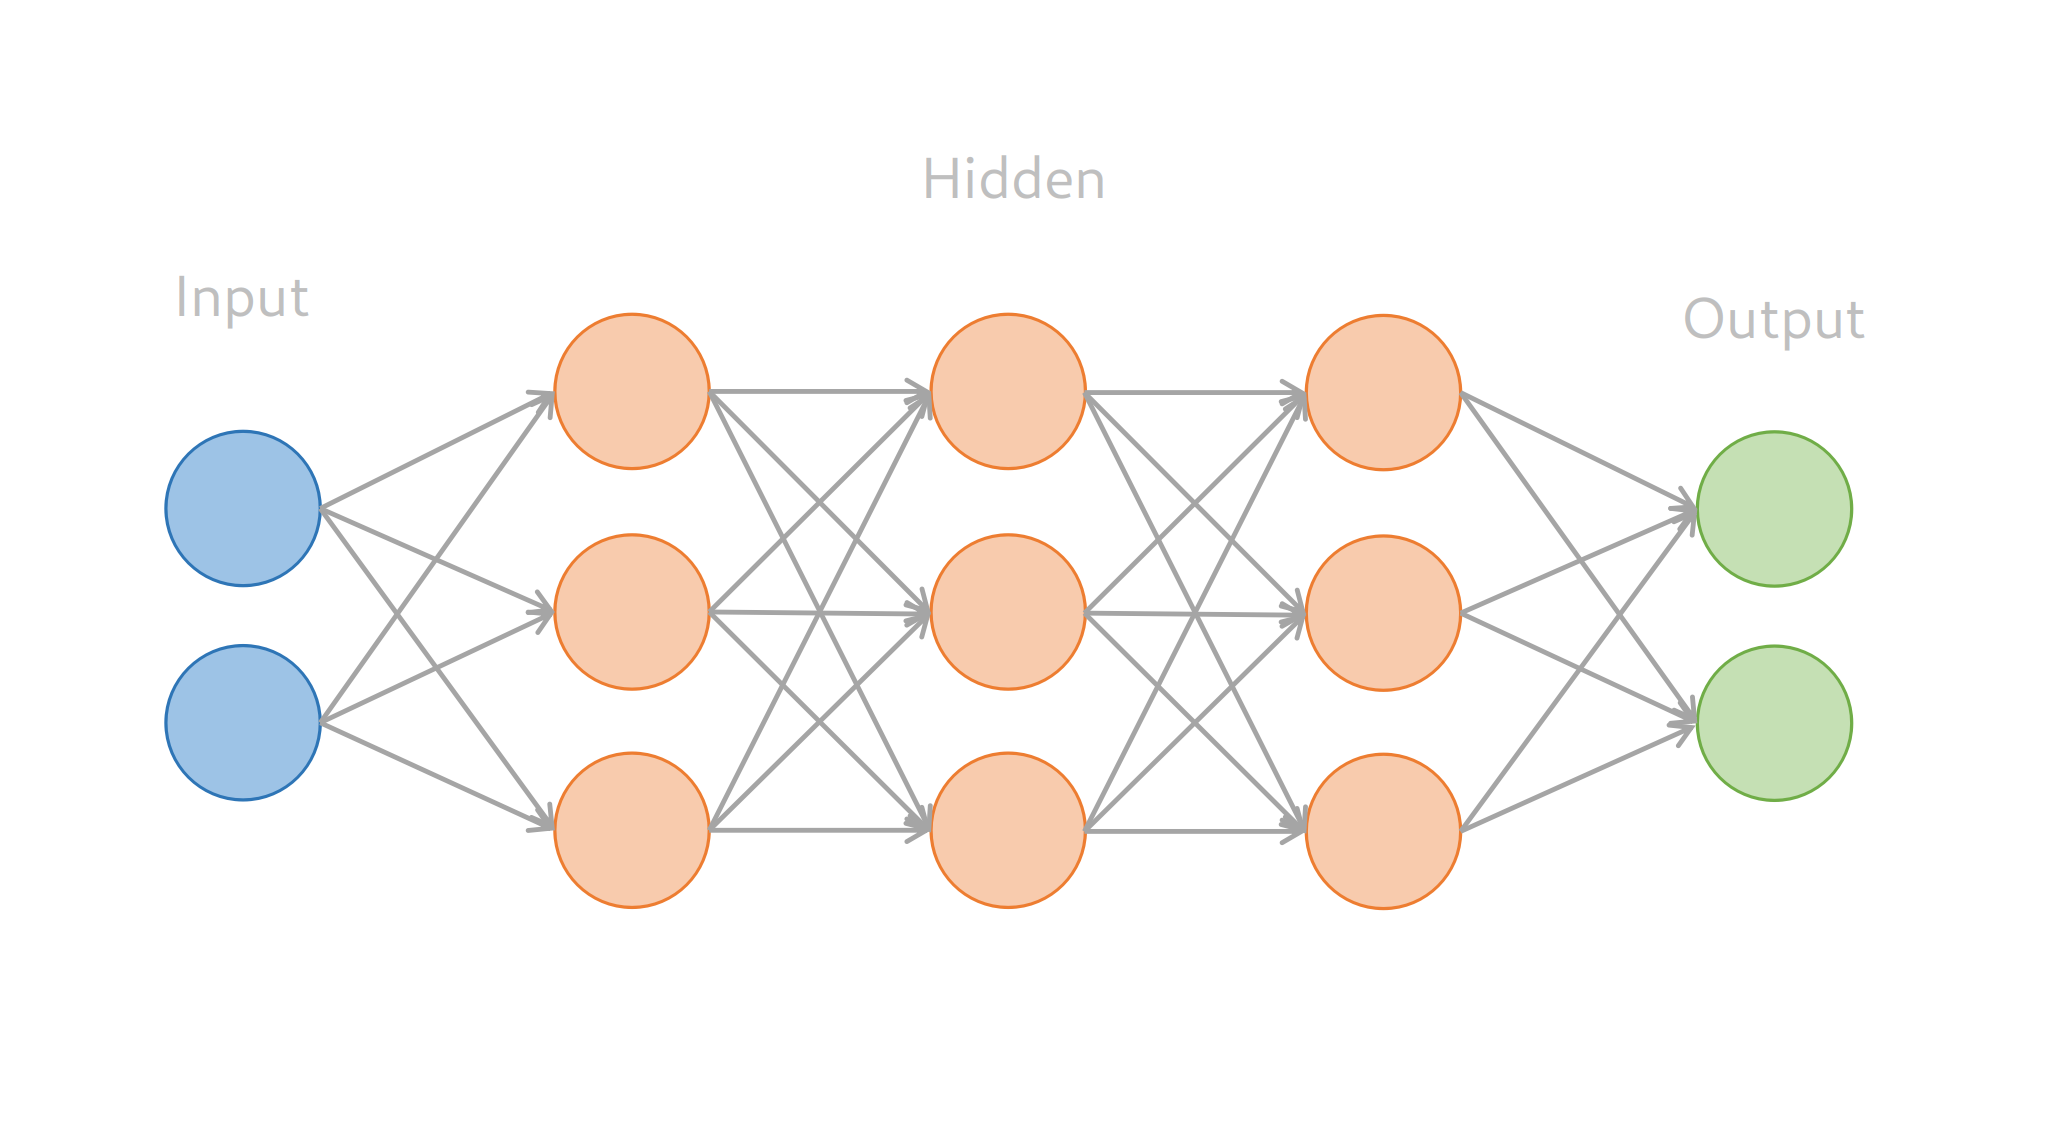
    
**Input Layer**: These neurons recieve the input data and feed it into the Neural Network. You've seen these quite a bit before.
    
**Output Layer**: These neurons perform the final activation of the data before outputting it as the prediction. <u>**The output layer determines what problem your Neural Network is solving! If you do not use an activation function, and you use the MSE cost function, then your Neural Network will solve regression problems. If your output layer uses the sigmoid activation as well as BCE cost, then your Neural Network will solve classification problems**</u>

**Hidden Layers**: These layers are called "Hidden" layers because what exactly happens here is unknown. In a Neural Network, what you can easily **visualize** are the contents of the **input layer** and the **output layer**, however the hidden layer is like a **"black box"** where the patterns each neuron learns cannot easily be predicted. In the programming exercise, we will print out the activations in the hidden layers.
    
The term **"Forward Propagation"** is often use in the context of Neural Networks. This is to describe the input data propagating forward through each and every layer, until it arrives at the output as the prediction.
    
    
#### In Summary:
    
The input layer handels feeding in your data to the Neural Network.
    
The output layer decides the type of problem your Neural Network is going to solve, whether it is regression or classification
    
The hidden layers allows the Neural Network to solve more complicated problems, and **this is what differentiates Neural Networks from basic Linear or Logistic Regression**.

### Activation Functions <a name="act">
    
Back when we introduced Logistic Regression, we introduced the idea of the **sigmoid activation function** which bounds the output between 0 and 1. Turns out, while you can use the sigmoid function in a Neural Network, it is often not preferred in the hidden layers. This is because sigmoid functions have slopes that are very shallow, thus significantly slowing down learning.
    
The **Tanh** activation function is often used instead of sigmoid, because its slopes are generally steeper, thus Neural Networks train faster using the Tanh function. Let's take a look at the Tanh function and compare it to the sigmoid function we programmed last time.

In [2]:
""" Supported functions:
Tanh
Sigmoid
Linear
ReLU
ELU
Leaky ReLU
"""

disp_2_func("Tanh", "Sigmoid")

Loading BokehJS ...

Another popular activation function is the **ReLU** activation function, which stands for **Rectified Linear Unit**. This function is even faster than Tanh, and has recently gained traction as a favourite among deep learning researchers. The ReLU function is linear if $z = 0$, and is $0$ if $z < 0$

In [3]:
disp_2_func("ReLU", "Sigmoid")

Loading BokehJS ...

So far we have given reasons to NOT use the sigmoid function, however that does not mean it is completely useless. If you are developing a Neural Network for **classification problems**, you would want the **output layer** to use a **sigmoid activation**. In the same sense, if you are developing a Neural Network for **regression problems**, you would use a **linear** activation on the last layer. In other words, linear equals no activation.

### Why do we need an Activation Function? <a name="why">
    
So far we've introduced you to a plethora of activation functions, but the question remains, *\"Why do we need activation functions in the first place?\"* It seems like getting rid of activation functions will still allow data to be propagated from one layer to the next, so what gives? 
    
The formal answer requires a mathematical proof, and since this course does not go into the math behind Machine Learning, we are going to answer it without the proof (if you want the proof regardless, it is down below). **Using a Neural Network without any activation functions will effectively render all hidden layers useless. Your Neural Network will essentially behave like a single layer Neural Network (keep in mind that we don't count the input layer as a layer).**
    
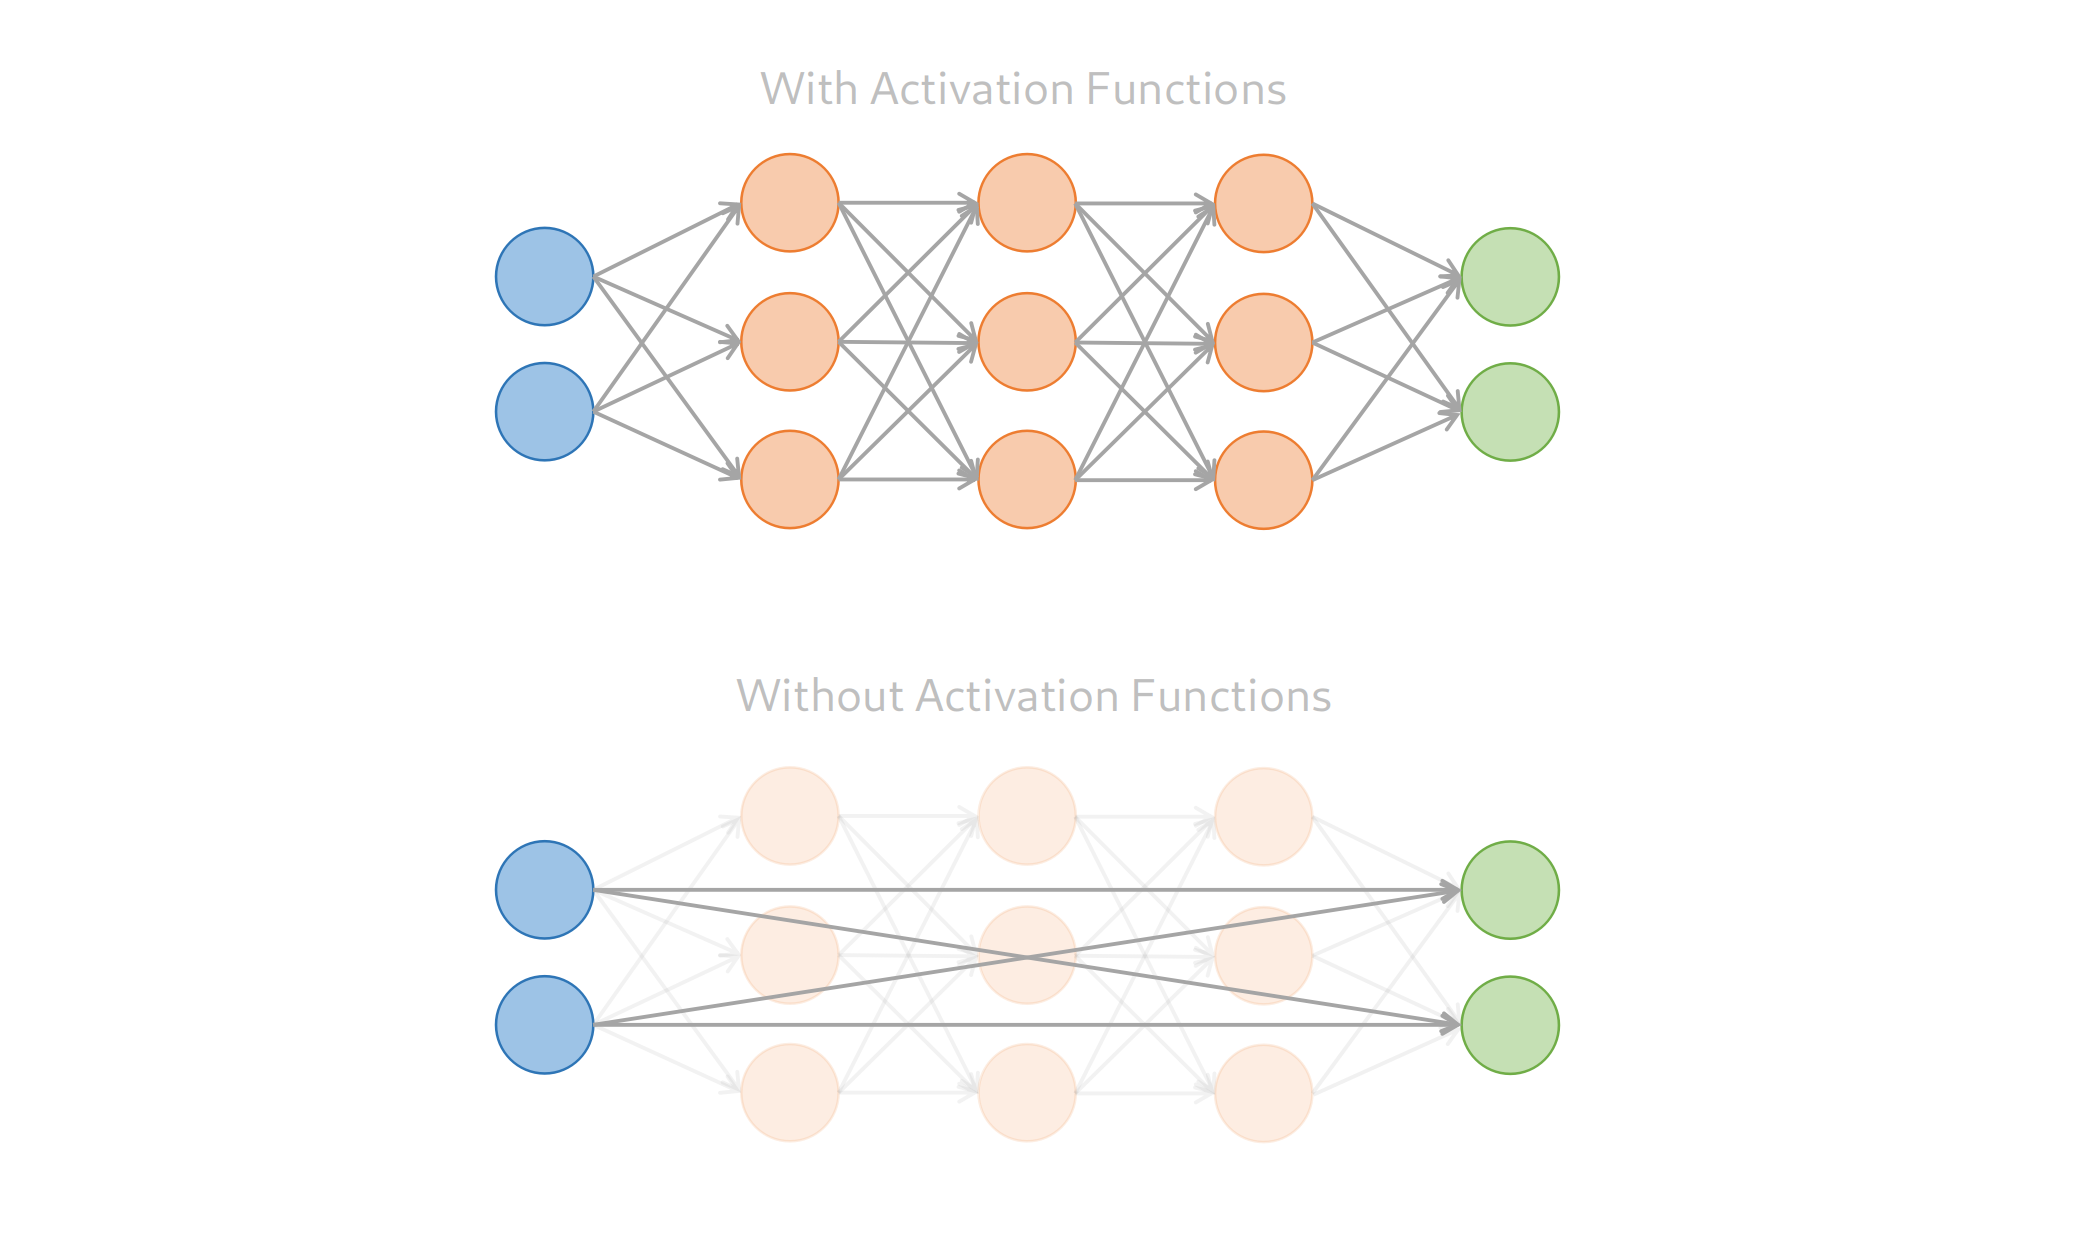
    
#### Proof for the Math Savvy
    
Notice that all activation functions are **Non-Linear** (except for the Linear activation function, obviously). The reason why Neural Networks behave like a one layer network when you use Linear activations is because the calculations for weighted sum are linear. Here we start off by defining the weighted sum:
    

$$z^{[l]} = W^{[l]}a^{[l-1]} + b^{[l]}$$

    
Where:
- $z$ is the weighted sum of the layer $l$
- $W$ is the weight matrix of the layer $l$
- $a$ is the activation of the layer $l$
- $b$ is the bias of the layer $l$
- $l$ is the layer index
    
Suppose our activation is linear, therefore:
    

$$a^{[l]} = z^{[l]}$$

    
Now we define the weighted sum for the next layer:

    

$$z^{[l+1]} = W^{[l+1]}a^{[l]} + b^{[l+1]}$$

    
And now, we sub in $a^{[l]}$ and simplify:
    
    

$$z^{[l+1]} = W^{[l+1]}(W^{[l]}a^{[l-1]} + b^{[l]}) + b^{[l+1]}$$  

$$z^{[l+1]} = W'a^{[l-1]} + b'$$

    
Where:
- $W' = W^{[l+]}W^{[l]}$
- $b' = W^{[l+1]}b^{[l]} + b^{[l+1]}$
    
Here, we can see that **we condensed two layers into one!** In fact we can continue to combine layers, effectively **reducing a multi-layer Neural Network into a single layer Neural Network** (with the computational complexity of the multi-layer net).
    
---

## How Neural Networks Learn <a name="learn">

By now, you have learned how Linear Regression models and Logistic Regression models learn to fit the training data. Turns out, since Neural Networks are essentially a bunch of Logistic Regression models chained together, the training procedure is very, very similar. Down below, we've detailed the steps taken by a Neural Network to fit the training data.

### Forward Propagation <a name="forward">
    
Forward propagation is the process of a Neural Network **making a prediction**. Each layer of the network has its own collection of weights $w$ and bias $b$. Information from one layer is **propagated** forward into the next layer, until it reaches the output layer.

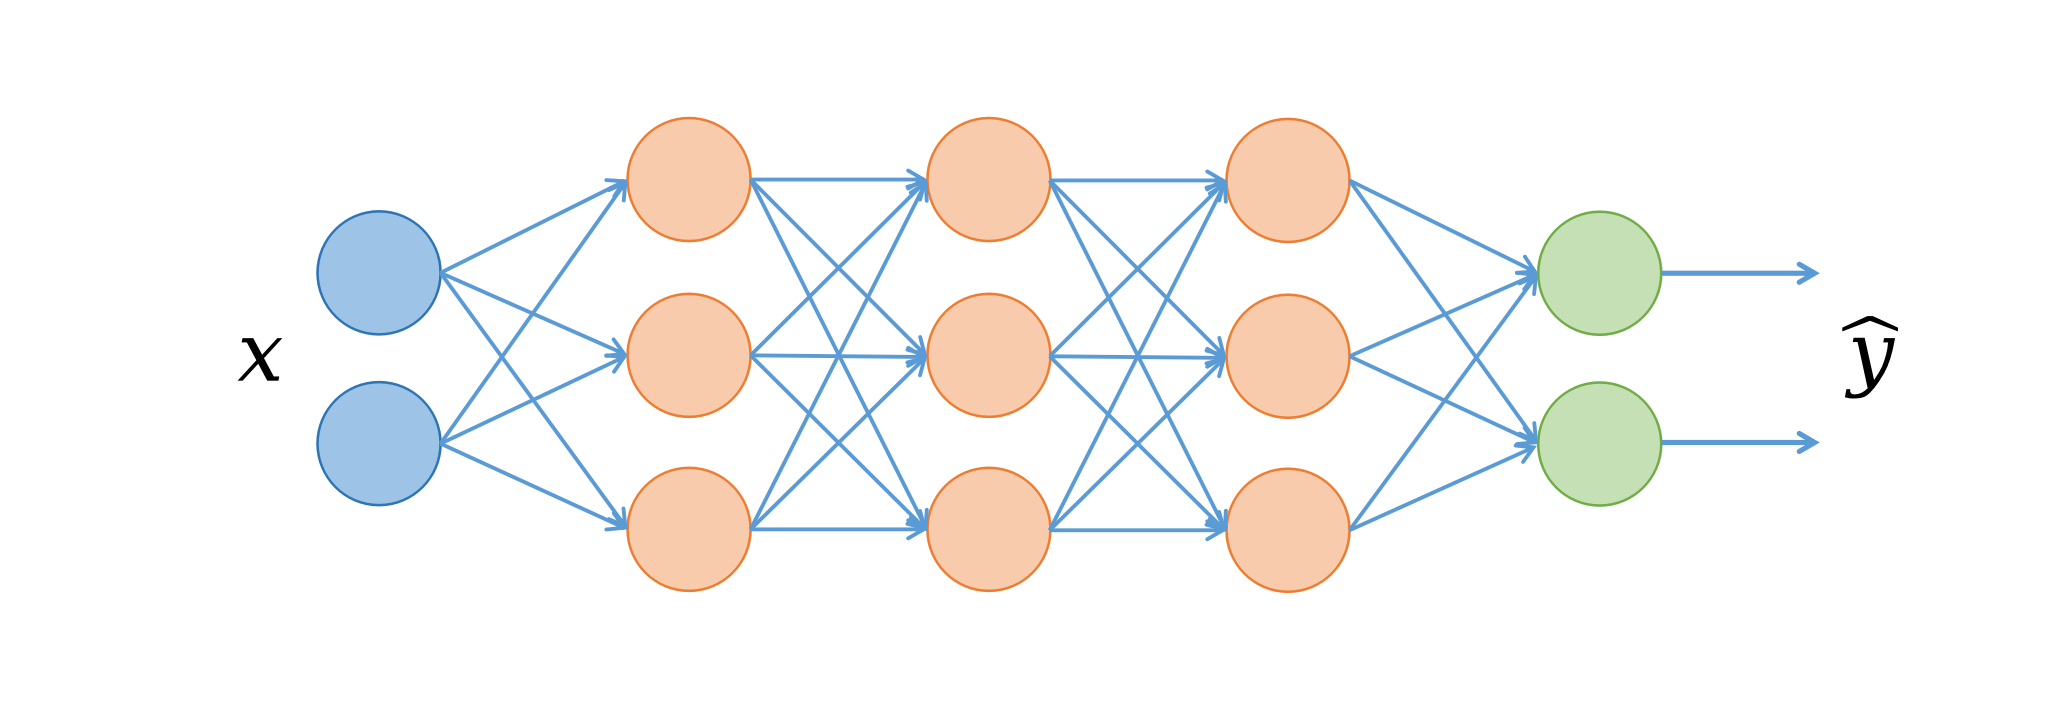
    
### Calculating Cost <a name="cost">
    
Forward propagation takes an input and outputs a **prediction**. The next step is to see how **\"wrong\"** our prediction is. Here we calculate the cost of our prediction given the current state of all $w$ and $b$. This would measure how far off we are from the actual labels. Remember, if we developed a neural network for regression purposes, we would use a **linear activation** in the last layer and **MSE cost**. If we develop a Neural Network for classification purposes, then we would use **sigmoid** or **softmax** activation for the last layer and **BCE** or **CCE** cost (**SPOILER ALERT!!!** softmax and CCE loss will be covered soon!)
    
### Back Propagation <a name="backward">

The Back Propagation process, we take the cost evaluated by the cost function and calculate the slopes (gradients) of the cost with respect with the weights and biases of the last layer. Then the **errors are propagated backwards through each layer** until we have the slopes of the cost with respect to every $w$ and $b$.
    
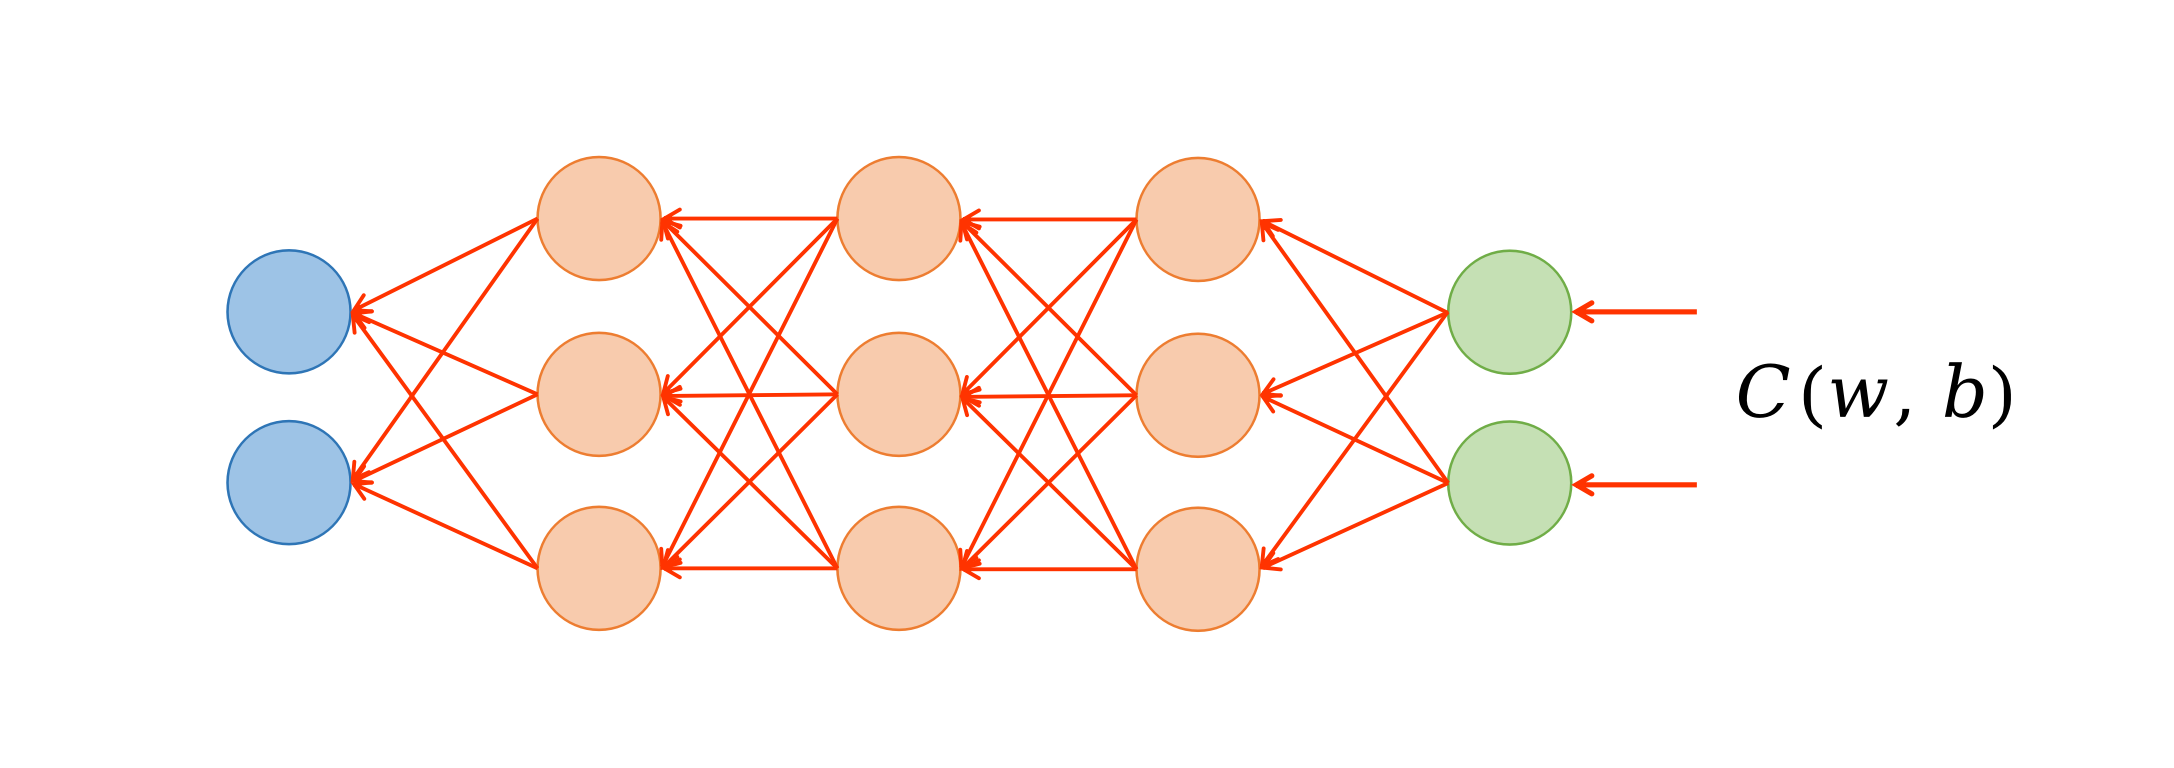
    
### Update all $w$ and $b$ <a name="update">
    
The final step is to update all the $w$ and $b$ with its respective **gradients**. These four steps are carried out iteratively until all the $w$ and $b$ are at their optimal values to make predictions with the lowest cost. Overall, these steps are very similar to the learning procedure of Linear Regression and Logistic Regression.
    
---

## Neural Network Applications <a name="applications">
    
So far, we have tackled regression and classification problems using Linear and Logistic Regression. Neural Networks take that one step further, being able to tackle these problems with incredible accuracy and performance. While we won't talk about regression and binary classification problems, as we have done this before and the process is very similar on Neural Networks, we are going to revisit **multi-class** classification, as well as introduce a new type of classification called **multi-task classification**
    
    
### Multi-class Classification <a name="mclass">
    
The general gist of multi-class classification remains the same -- we are predicting on $n$ classes with $n$ output neurons in the output layer. Remember, this is very similar to training multiple Neural Networks for each class! The output neurons each have **sigmoid** activations, and the cost function used to evaluate the prediction error is **Binary Cross Entropy**. An example prediction from the multi-class neural network is shown below:
    
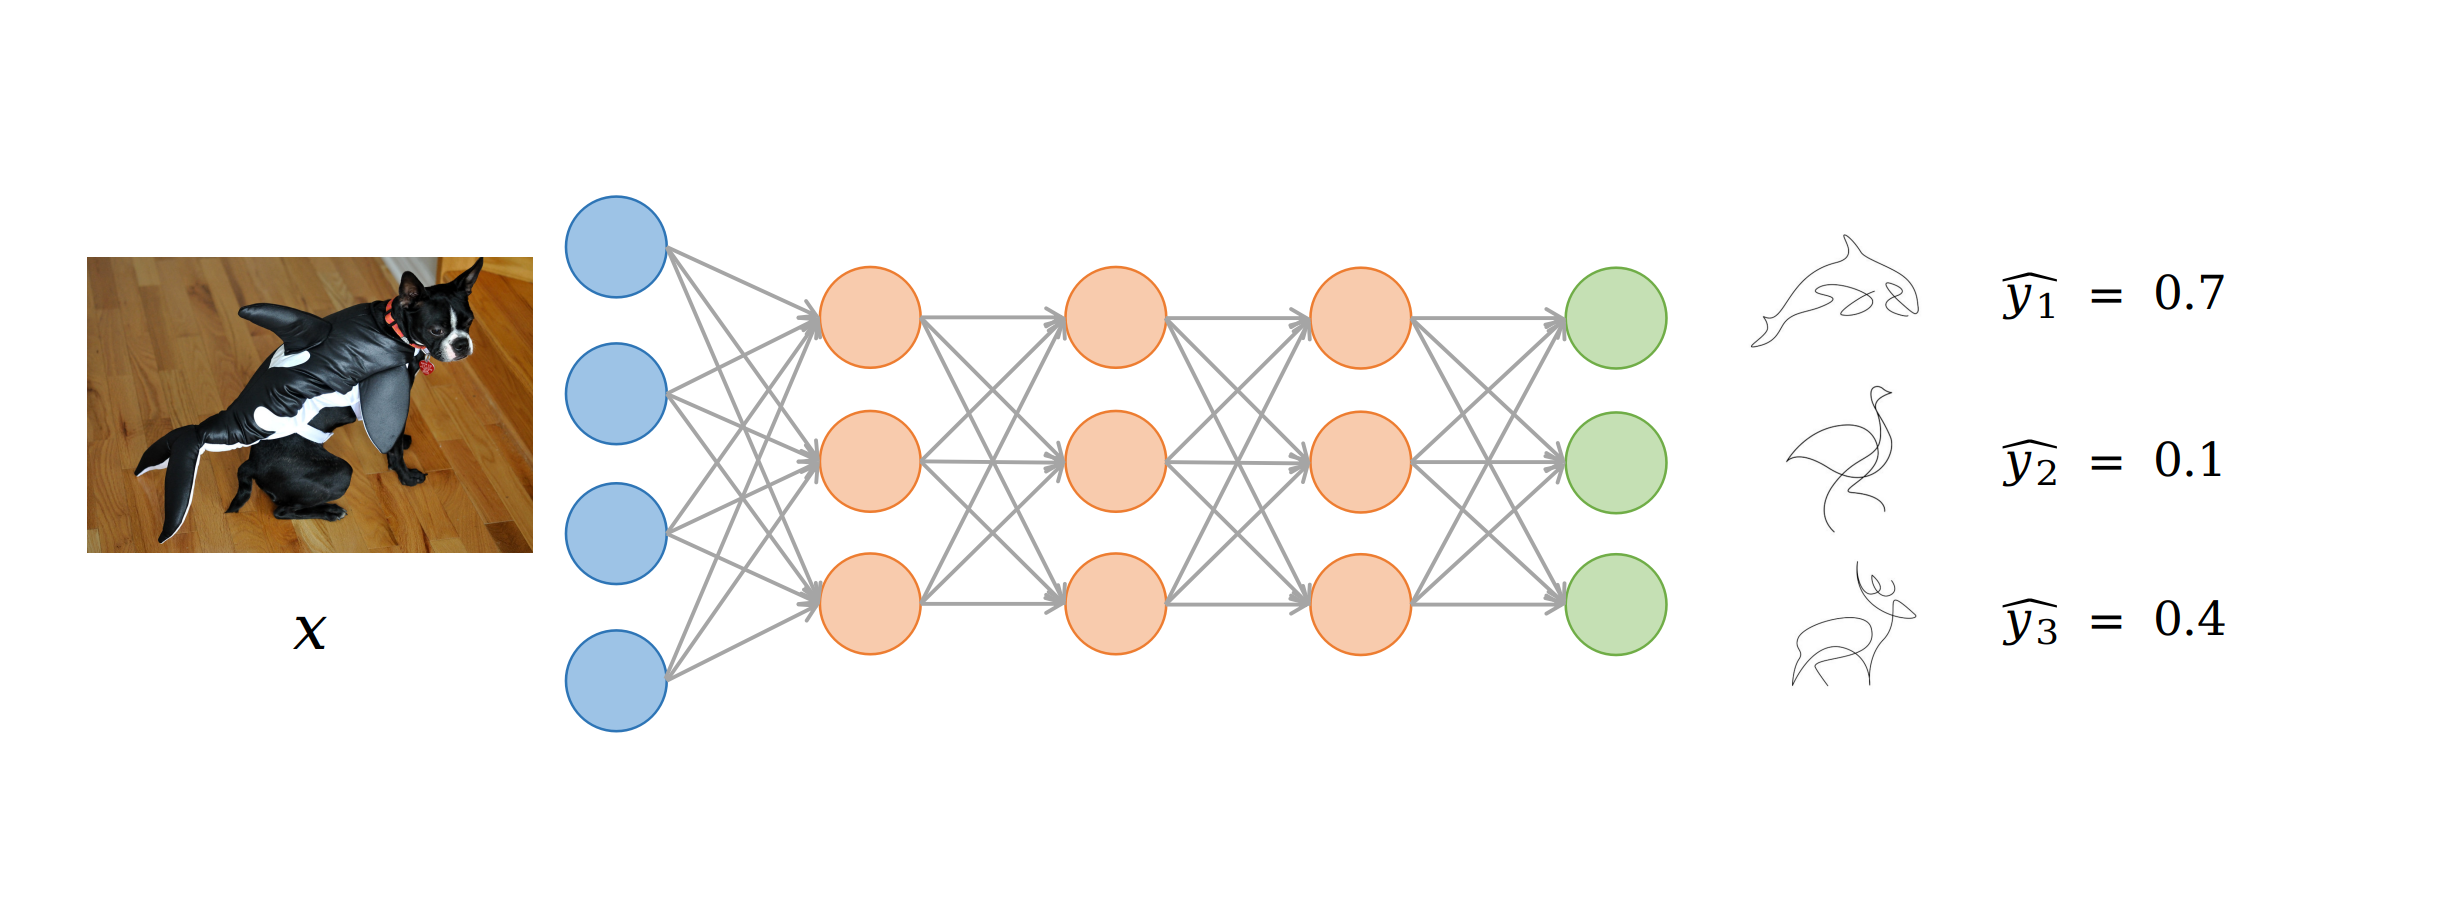
    
#### Softmax Activation 
    
As previously alluded, we are going to talk about another activation function. When performing multi-class classification, while the sigmoid activation function works very well, often times deep learning practitioners prefer the softmax activation function. Here's the formula for the function, even though we don't require you to know it for the course:
    

$$\begin{align}\text{softmax}(z) = {e^z \over \sum\limits_{j=1}^{n^{[L]}}e^z_j}\end{align}$$

    
Down below is shows the same Neural Network equipped with the softmax function on the output layer:
    
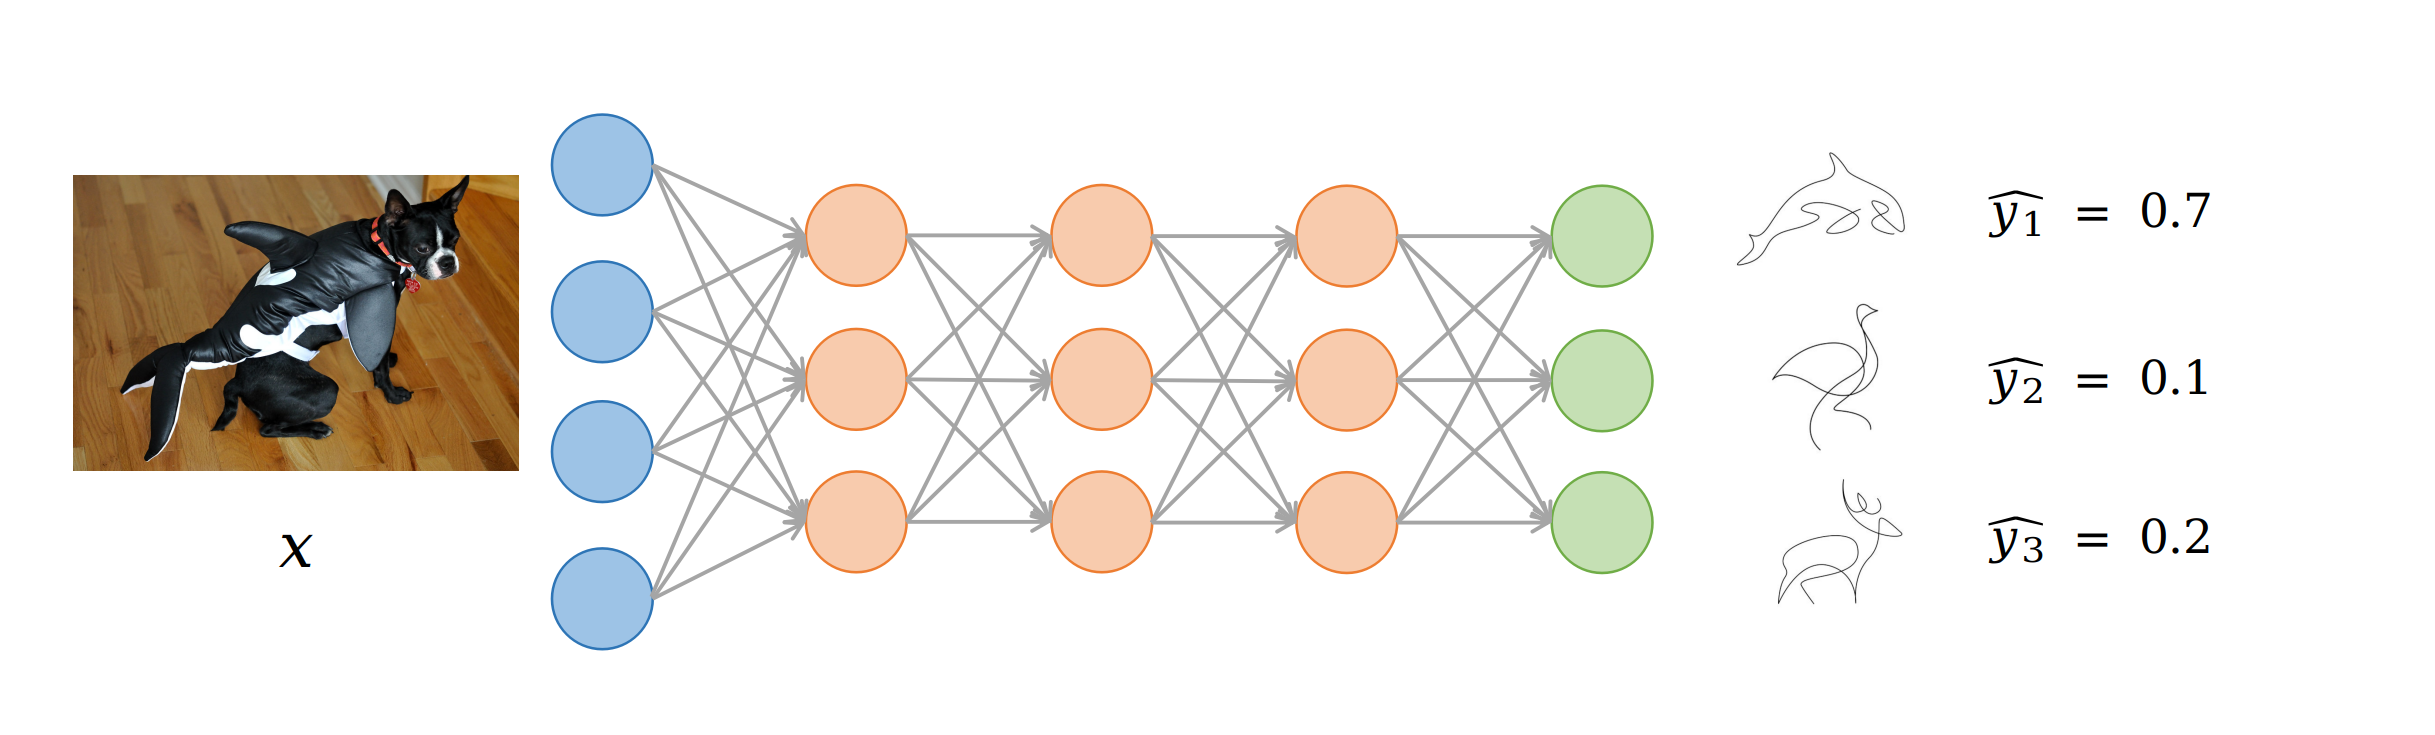 

See any differences? **The softmax activation function makes sure the output probabilities sum to 1**. This is the main reason why experts prefer softmax over sigmoid for multi-class classification, as it doesn't really make sense for an image to have a 70% probability to be an orca, and 40% probability to be a deer.
    
#### Categorical Cross Entropy
    
Since we are using a new activation function, we also need to use a different **cost** function. Neural Networks using the **softmax** activation function should use the **Categorical Cross Entropy (CCE)** cost function. This is slightly simpler than **BCE**, and thus slightly quicker.
    

$$\begin{align}\text{CCE}(w, b) = {1\over m}\sum\limits_{i=1}^m \sum\limits_{j=1}^C y_j^{(i)}\log(\hat{y_j}^{(i)})\end{align}$$

    
    
**In summary**, from now on when we build a multi-class classifer, we are going to use **softmax activation** and **CCE** instead of **sigmoid activation** and **BCE**

### Multi-task Classification <a name="mtask">
    
Multi-task classification works similarly to multi-class classification, however the key difference is multi-task classification allows for **multiple** output neurons to output 1, whereas in multi-class classification only one output neuron can output 1 at any time, which denotes the **class** of the input data
    
One example of Multi-task classification is in **self driving cars**. When the camera system in a self driving car captures the scene, the picture is not limited to only have traffic lights, or only to have pedestrians, or only to have street signs. The image might have pedestrians **and** street signs, or any combination of those three. For example, if we denote the label $y_1$ to be **pedestrians**, $y_2$ to be **stop signs**, and $y_3$ to be **traffic lights**, following label would represent an image with **pedestrians** and **traffic lights**:
    

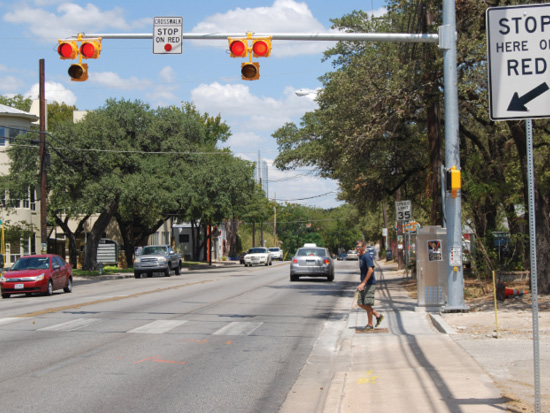

$$\hat{y} \  =  \ \begin{bmatrix}1 \\ 0 \\ 1\end{bmatrix} \begin{matrix}\implies\text{pedestrians} \\ \implies\text{no stop signs} \\  \implies\text{traffic lights}\end{matrix}$$
    
</div>
    
Here, since the output doesn't have to sum to 1, we will use the **sigmoid activation** function along with **BCE loss**.
    
---

## Neural Networks In Action <a name="action"></a>

Congrats on making it this far! Now that you have learned how a Neural Network works, as well as some new and refreshed applications of Neural Networks, its time to train one to see it in action! For the sake of simplicity, we are going to train the Neural Network using **SKLearn's** `MLPClassifier` class.

> Note: "MLP" stands for "Multi Layer Perceptron". Perceptron is a fancy word for "Neuron", thus MLP basically means Neural Network!

### Creating the Ultimate Candy <a name="candy"></a>

Suppose you are running a **candy company** called **Skootles**. As with all candy companies, they want to maximize sales by creating a hit product that's going to fly off the store shelves. The product has to be **affordable** and **popular**. You notice that your competitors **N&N** has hired a handful of industry experts to analyze a dataset containing the **ingredients** of various candies and their corresponding **relative price** and **popularity**. You believe you can train a **Neural Network** that is going to cost much less than hiring experts, and possibly perform better as well.

### Visualizing the Dataset <a name="dataset"></a>

The first step is to understand what our data looks like. We will use the **The Ultimate Halloween Candy Power Ranking** dataset by [FiveThirtyEight](https://www.kaggle.com/fivethirtyeight/the-ultimate-halloween-candy-power-ranking/). Loading the dataset should be quite familiar to you, as this was done in many of our previous topics.

In [4]:
dataset = pd.read_csv("datasets/candy-data.csv")
dataset

competitorname  chocolate  fruity  caramel  peanutyalmondy  \
0                    100 Grand          1       0        1               0   
1                 3 Musketeers          1       0        0               0   
2                     One dime          0       0        0               0   
3                  One quarter          0       0        0               0   
4                    Air Heads          0       1        0               0   
..                         ...        ...     ...      ...             ...   
80                   Twizzlers          0       1        0               0   
81                    Warheads          0       1        0               0   
82        WelchÕs Fruit Snacks          0       1        0               0   
83  WertherÕs Original Caramel          0       0        1               0   
84                    Whoppers          1       0        0               0   

    nougat  crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0        0                 1     0    1         0         0.732         0.860   
1        1                 0     0    1         0         0.604         0.511   
2        0                 0     0    0         0         0.011         0.116   
3        0                 0     0    0         0         0.011         0.511   
4        0                 0     0    0         0         0.906         0.511   
..     ...               ...   ...  ...       ...           ...           ...   
80       0                 0     0    0         0         0.220         0.116   
81       0                 0     1    0         0         0.093         0.116   
82       0                 0     0    0         1         0.313         0.313   
83       0                 0     1    0         0         0.186         0.267   
84       0                 1     0    0         1         0.872         0.848   

    winpercent  
0    66.971725  
1    67.602936  
2    32.261086  
3    46.116505  
4    52.341465  
..         ...  
80   45.466282  
81   39.011898  
82   44.375519  
83   41.904308  
84   49.524113  

[85 rows x 13 columns]

Looking at the DataFrame we created, we can see a bunch of candy features ranging from `chocolate` to `pluribus`, as well as the `sugarpercent`, `pricepercent`, and `winpercent`. Our goal for this problem is to predict the **ingredients** that will go into our candy given the inputs for relative cost (`pricepercent`) as well as popularity (`winpercent`).

Looking at the **first datapoint**, we can see that the candy in question contains **chocolate, caramel, rice wafer**, and is shaped like a **bar**. We want to be able to input the **price percentage** and **popularity**, and have the Neural Network output the optimal ingredients. That way, the candy makers at **Skootles** can input a high popularity, low price, and have the Neural Network predict on the ingredients needed to achieve that.

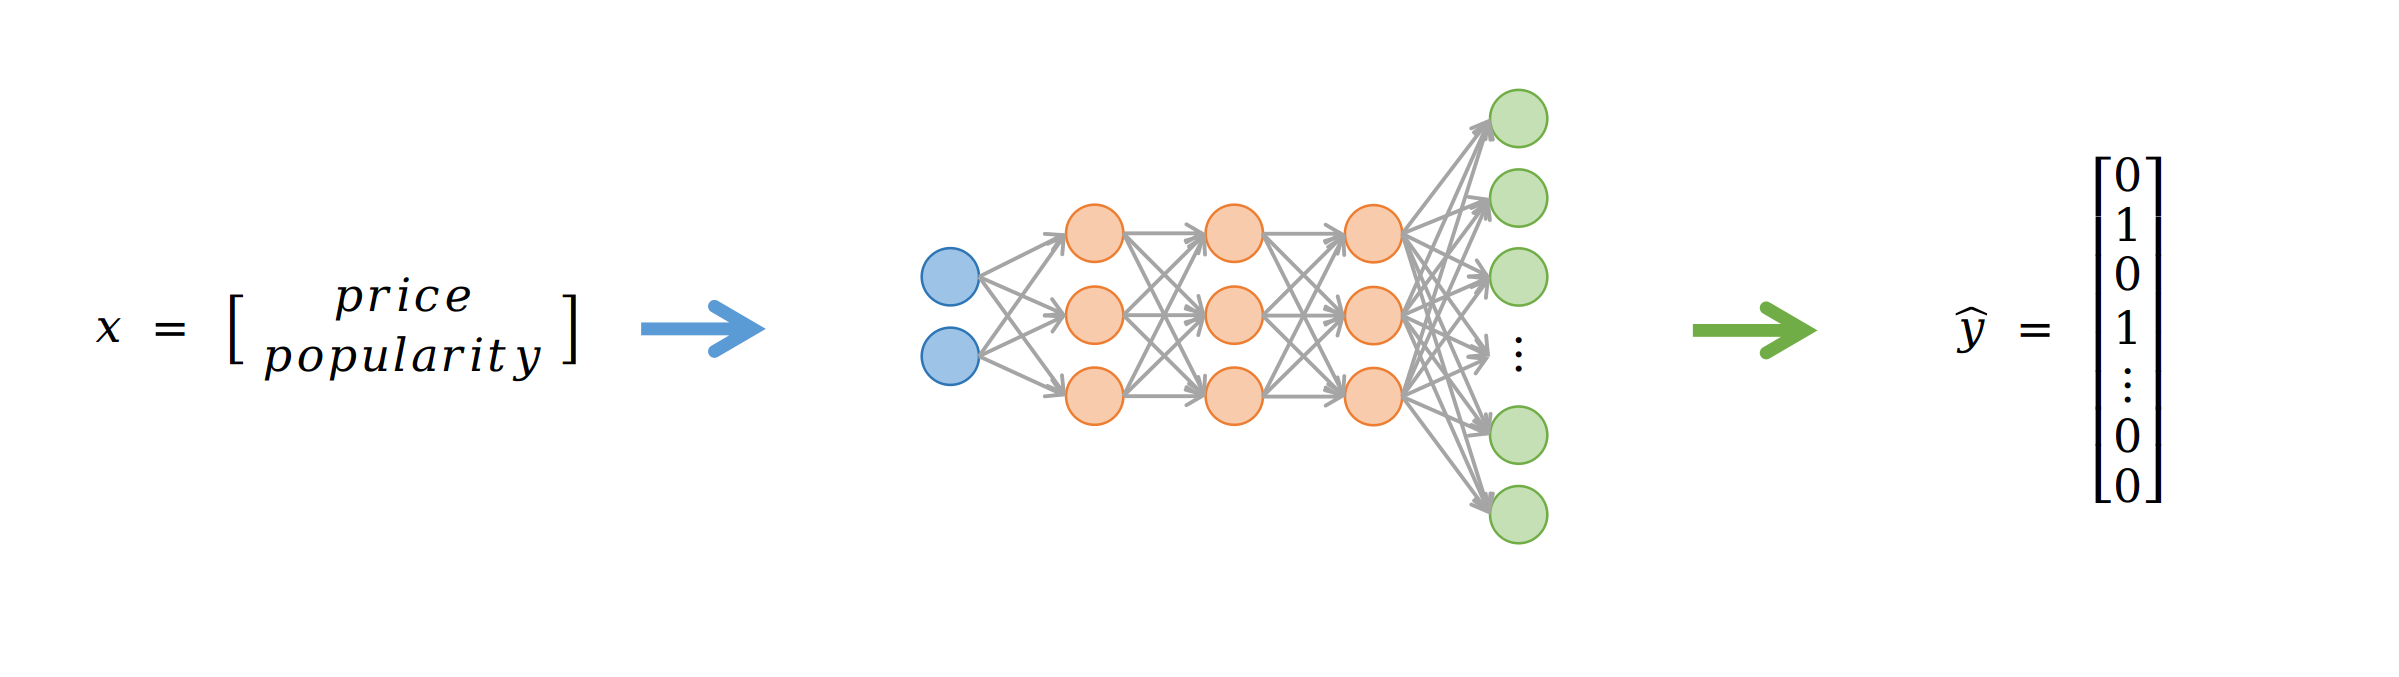

#### Question for Students:

What kind of problem is this? Is this Regression, Binary Classification, Multi-class Classification, or Multi-task Classification?

In [5]:
# Convert selected columns to Numpy
features = dataset[['pricepercent', 'winpercent']].to_numpy()
labels = dataset.iloc[:, 1:10].to_numpy()


print(f"Features shape: {features.shape}")
print(f"Labels shape: {labels.shape}")

Features shape: (85, 2)
Labels shape: (85, 9)


### Training the Neural Network <a name="training"></a>


The next step is to preprocess the data. Everything is quite familiar here, except for the `StandardScaler` class. Recall in the previous topic, we learned that when features are on **vastly different scales**, the result is a **highly elliptical cost function** that is **tricky to traverse**. Implementing **standard normalization** in `LinearRegression` and `LogisticRegressionCV` was as simple as setting the `normalize` parameter to `True`. `MLPClassifier` however does not have that feature, so we have to implement it ourselves. The `StandardScaler` class is used to perform standard normalization to our data.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

np.random.seed(42)

# Create polynomial features out of input
poly = PolynomialFeatures(degree=3)
# Used to normalize the input
scaler = StandardScaler()

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.25)

# Poly transforms and Scaling
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Now its time to implement our Neural Network in SKLearn. For this exercise, we are going to use **5 hidden layers** each with **3 neurons** to increase the complexity of hypothesis functions we could learn. `MLPClassifier` has already pre-set the output layer's activation function to **sigmoid**, which is great because this is a multi-task classification problem

What we need to specify is the activation function for the hidden units. 

#### Question for the students

`MLPClassifier` allows us to specify the activation function for the hidden units to be `"linear"`. Should we? Should we not? Why?

In [28]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(3, 3, 3, 3, 3), activation="relu", verbose=True, max_iter=10000, alpha=1e-4)

model.fit(X_train, Y_train)

Iteration 1, loss = 6.58644639
Iteration 2, loss = 6.57781115
Iteration 3, loss = 6.56932176
Iteration 4, loss = 6.56101983
Iteration 5, loss = 6.55293043
Iteration 6, loss = 6.54498591
Iteration 7, loss = 6.53718491
Iteration 8, loss = 6.52951829
Iteration 9, loss = 6.52198584
Iteration 10, loss = 6.51459330
Iteration 11, loss = 6.50734001
Iteration 12, loss = 6.50022511
Iteration 13, loss = 6.49325678
Iteration 14, loss = 6.48644871
Iteration 15, loss = 6.47977590
Iteration 16, loss = 6.47325103
Iteration 17, loss = 6.46686163
Iteration 18, loss = 6.46060212
Iteration 19, loss = 6.45447036
Iteration 20, loss = 6.44846418
Iteration 21, loss = 6.44258269
Iteration 22, loss = 6.43683044
Iteration 23, loss = 6.43119684
Iteration 24, loss = 6.42567943
Iteration 25, loss = 6.42027573
Iteration 26, loss = 6.41501215
Iteration 27, loss = 6.40986992
Iteration 28, loss = 6.40483362
Iteration 29, loss = 6.39990043
Iteration 30, loss = 6.39506753
Iteration 31, loss = 6.39033219
Iteration 32, los

Iteration 280, loss = 5.30248453
Iteration 281, loss = 5.29467935
Iteration 282, loss = 5.28692908
Iteration 283, loss = 5.27923542
Iteration 284, loss = 5.27159676
Iteration 285, loss = 5.26401329
Iteration 286, loss = 5.25647166
Iteration 287, loss = 5.24899025
Iteration 288, loss = 5.24157079
Iteration 289, loss = 5.23421489
Iteration 290, loss = 5.22692403
Iteration 291, loss = 5.21969959
Iteration 292, loss = 5.21254281
Iteration 293, loss = 5.20545487
Iteration 294, loss = 5.19843683
Iteration 295, loss = 5.19148965
Iteration 296, loss = 5.18461422
Iteration 297, loss = 5.17781569
Iteration 298, loss = 5.17109646
Iteration 299, loss = 5.16444844
Iteration 300, loss = 5.15786197
Iteration 301, loss = 5.15135474
Iteration 302, loss = 5.14492100
Iteration 303, loss = 5.13856151
Iteration 304, loss = 5.13227693
Iteration 305, loss = 5.12607061
Iteration 306, loss = 5.11994594
Iteration 307, loss = 5.11389658
Iteration 308, loss = 5.10792374
Iteration 309, loss = 5.10202818
Iteration 

Iteration 722, loss = 4.49977383
Iteration 723, loss = 4.49888692
Iteration 724, loss = 4.49799605
Iteration 725, loss = 4.49710262
Iteration 726, loss = 4.49620727
Iteration 727, loss = 4.49532077
Iteration 728, loss = 4.49441668
Iteration 729, loss = 4.49352487
Iteration 730, loss = 4.49262957
Iteration 731, loss = 4.49173299
Iteration 732, loss = 4.49083320
Iteration 733, loss = 4.48992952
Iteration 734, loss = 4.48902356
Iteration 735, loss = 4.48811491
Iteration 736, loss = 4.48720374
Iteration 737, loss = 4.48629094
Iteration 738, loss = 4.48537647
Iteration 739, loss = 4.48446550
Iteration 740, loss = 4.48354689
Iteration 741, loss = 4.48263585
Iteration 742, loss = 4.48172398
Iteration 743, loss = 4.48080795
Iteration 744, loss = 4.47988800
Iteration 745, loss = 4.47896438
Iteration 746, loss = 4.47803763
Iteration 747, loss = 4.47711141
Iteration 748, loss = 4.47618321
Iteration 749, loss = 4.47525438
Iteration 750, loss = 4.47432364
Iteration 751, loss = 4.47339389
Iteration 

Iteration 1180, loss = 4.05016469
Iteration 1181, loss = 4.04936863
Iteration 1182, loss = 4.04857561
Iteration 1183, loss = 4.04778653
Iteration 1184, loss = 4.04699311
Iteration 1185, loss = 4.04620422
Iteration 1186, loss = 4.04541402
Iteration 1187, loss = 4.04462742
Iteration 1188, loss = 4.04384781
Iteration 1189, loss = 4.04305906
Iteration 1190, loss = 4.04227231
Iteration 1191, loss = 4.04150434
Iteration 1192, loss = 4.04070043
Iteration 1193, loss = 4.03991978
Iteration 1194, loss = 4.03913846
Iteration 1195, loss = 4.03838006
Iteration 1196, loss = 4.03758506
Iteration 1197, loss = 4.03680770
Iteration 1198, loss = 4.03604210
Iteration 1199, loss = 4.03525591
Iteration 1200, loss = 4.03448282
Iteration 1201, loss = 4.03371891
Iteration 1202, loss = 4.03293562
Iteration 1203, loss = 4.03216312
Iteration 1204, loss = 4.03141058
Iteration 1205, loss = 4.03062056
Iteration 1206, loss = 4.02984827
Iteration 1207, loss = 4.02911302
Iteration 1208, loss = 4.02831936
Iteration 1209

Iteration 1469, loss = 3.85224261
Iteration 1470, loss = 3.85156437
Iteration 1471, loss = 3.85112295
Iteration 1472, loss = 3.85058237
Iteration 1473, loss = 3.85000522
Iteration 1474, loss = 3.84937367
Iteration 1475, loss = 3.84891564
Iteration 1476, loss = 3.84832955
Iteration 1477, loss = 3.84774292
Iteration 1478, loss = 3.84722295
Iteration 1479, loss = 3.84667498
Iteration 1480, loss = 3.84609895
Iteration 1481, loss = 3.84553170
Iteration 1482, loss = 3.84500101
Iteration 1483, loss = 3.84444574
Iteration 1484, loss = 3.84390598
Iteration 1485, loss = 3.84338415
Iteration 1486, loss = 3.84282525
Iteration 1487, loss = 3.84220632
Iteration 1488, loss = 3.84172406
Iteration 1489, loss = 3.84128275
Iteration 1490, loss = 3.84068265
Iteration 1491, loss = 3.84003520
Iteration 1492, loss = 3.83950505
Iteration 1493, loss = 3.83903268
Iteration 1494, loss = 3.83840448
Iteration 1495, loss = 3.83782069
Iteration 1496, loss = 3.83727561
Iteration 1497, loss = 3.83670214
Iteration 1498

Iteration 1749, loss = 3.71896379
Iteration 1750, loss = 3.71852271
Iteration 1751, loss = 3.71815273
Iteration 1752, loss = 3.71772011
Iteration 1753, loss = 3.71740495
Iteration 1754, loss = 3.71701186
Iteration 1755, loss = 3.71650940
Iteration 1756, loss = 3.71617612
Iteration 1757, loss = 3.71579384
Iteration 1758, loss = 3.71530386
Iteration 1759, loss = 3.71507105
Iteration 1760, loss = 3.71472753
Iteration 1761, loss = 3.71424937
Iteration 1762, loss = 3.71376929
Iteration 1763, loss = 3.71345304
Iteration 1764, loss = 3.71309913
Iteration 1765, loss = 3.71266679
Iteration 1766, loss = 3.71218864
Iteration 1767, loss = 3.71178544
Iteration 1768, loss = 3.71150517
Iteration 1769, loss = 3.71109769
Iteration 1770, loss = 3.71058869
Iteration 1771, loss = 3.71025693
Iteration 1772, loss = 3.70983244
Iteration 1773, loss = 3.70945680
Iteration 1774, loss = 3.70909057
Iteration 1775, loss = 3.70875882
Iteration 1776, loss = 3.70832641
Iteration 1777, loss = 3.70793022
Iteration 1778

Iteration 2057, loss = 3.61450700
Iteration 2058, loss = 3.61421184
Iteration 2059, loss = 3.61398910
Iteration 2060, loss = 3.61370322
Iteration 2061, loss = 3.61332021
Iteration 2062, loss = 3.61301666
Iteration 2063, loss = 3.61277957
Iteration 2064, loss = 3.61247595
Iteration 2065, loss = 3.61216253
Iteration 2066, loss = 3.61194661
Iteration 2067, loss = 3.61169000
Iteration 2068, loss = 3.61139501
Iteration 2069, loss = 3.61113224
Iteration 2070, loss = 3.61082756
Iteration 2071, loss = 3.61055617
Iteration 2072, loss = 3.61031216
Iteration 2073, loss = 3.61008292
Iteration 2074, loss = 3.60977026
Iteration 2075, loss = 3.60948021
Iteration 2076, loss = 3.60912279
Iteration 2077, loss = 3.60888565
Iteration 2078, loss = 3.60857589
Iteration 2079, loss = 3.60832733
Iteration 2080, loss = 3.60810393
Iteration 2081, loss = 3.60780540
Iteration 2082, loss = 3.60745729
Iteration 2083, loss = 3.60728240
Iteration 2084, loss = 3.60691675
Iteration 2085, loss = 3.60667132
Iteration 2086

Iteration 2372, loss = 3.53873910
Iteration 2373, loss = 3.53867395
Iteration 2374, loss = 3.53835821
Iteration 2375, loss = 3.53816984
Iteration 2376, loss = 3.53795210
Iteration 2377, loss = 3.53772016
Iteration 2378, loss = 3.53746740
Iteration 2379, loss = 3.53727724
Iteration 2380, loss = 3.53704321
Iteration 2381, loss = 3.53674536
Iteration 2382, loss = 3.53652398
Iteration 2383, loss = 3.53640960
Iteration 2384, loss = 3.53613445
Iteration 2385, loss = 3.53595806
Iteration 2386, loss = 3.53581378
Iteration 2387, loss = 3.53558535
Iteration 2388, loss = 3.53539466
Iteration 2389, loss = 3.53517995
Iteration 2390, loss = 3.53494204
Iteration 2391, loss = 3.53505146
Iteration 2392, loss = 3.53455055
Iteration 2393, loss = 3.53438660
Iteration 2394, loss = 3.53419371
Iteration 2395, loss = 3.53398106
Iteration 2396, loss = 3.53376981
Iteration 2397, loss = 3.53357875
Iteration 2398, loss = 3.53337061
Iteration 2399, loss = 3.53314809
Iteration 2400, loss = 3.53298477
Iteration 2401

Iteration 2648, loss = 3.48936263
Iteration 2649, loss = 3.48920063
Iteration 2650, loss = 3.48902044
Iteration 2651, loss = 3.48895416
Iteration 2652, loss = 3.48870786
Iteration 2653, loss = 3.48855759
Iteration 2654, loss = 3.48841279
Iteration 2655, loss = 3.48823106
Iteration 2656, loss = 3.48806344
Iteration 2657, loss = 3.48796898
Iteration 2658, loss = 3.48776219
Iteration 2659, loss = 3.48762639
Iteration 2660, loss = 3.48747086
Iteration 2661, loss = 3.48733411
Iteration 2662, loss = 3.48714821
Iteration 2663, loss = 3.48700424
Iteration 2664, loss = 3.48690595
Iteration 2665, loss = 3.48678764
Iteration 2666, loss = 3.48662238
Iteration 2667, loss = 3.48643347
Iteration 2668, loss = 3.48623246
Iteration 2669, loss = 3.48617721
Iteration 2670, loss = 3.48594654
Iteration 2671, loss = 3.48582908
Iteration 2672, loss = 3.48573743
Iteration 2673, loss = 3.48561807
Iteration 2674, loss = 3.48549798
Iteration 2675, loss = 3.48534372
Iteration 2676, loss = 3.48521207
Iteration 2677

Iteration 2946, loss = 3.44862820
Iteration 2947, loss = 3.44845294
Iteration 2948, loss = 3.44830095
Iteration 2949, loss = 3.44817709
Iteration 2950, loss = 3.44807775
Iteration 2951, loss = 3.44795854
Iteration 2952, loss = 3.44782052
Iteration 2953, loss = 3.44769651
Iteration 2954, loss = 3.44761222
Iteration 2955, loss = 3.44752486
Iteration 2956, loss = 3.44741705
Iteration 2957, loss = 3.44729166
Iteration 2958, loss = 3.44714714
Iteration 2959, loss = 3.44698979
Iteration 2960, loss = 3.44694639
Iteration 2961, loss = 3.44674069
Iteration 2962, loss = 3.44664205
Iteration 2963, loss = 3.44652302
Iteration 2964, loss = 3.44638575
Iteration 2965, loss = 3.44630708
Iteration 2966, loss = 3.44615690
Iteration 2967, loss = 3.44607468
Iteration 2968, loss = 3.44597216
Iteration 2969, loss = 3.44584997
Iteration 2970, loss = 3.44571012
Iteration 2971, loss = 3.44555534
Iteration 2972, loss = 3.44558084
Iteration 2973, loss = 3.44531551
Iteration 2974, loss = 3.44521797
Iteration 2975

Iteration 3223, loss = 3.41904920
Iteration 3224, loss = 3.41910433
Iteration 3225, loss = 3.41912609
Iteration 3226, loss = 3.41909832
Iteration 3227, loss = 3.41902115
Iteration 3228, loss = 3.41889787
Iteration 3229, loss = 3.41873450
Iteration 3230, loss = 3.41854466
Iteration 3231, loss = 3.41834482
Iteration 3232, loss = 3.41817684
Iteration 3233, loss = 3.41840251
Iteration 3234, loss = 3.41817576
Iteration 3235, loss = 3.41793804
Iteration 3236, loss = 3.41794517
Iteration 3237, loss = 3.41792287
Iteration 3238, loss = 3.41787135
Iteration 3239, loss = 3.41779198
Iteration 3240, loss = 3.41768724
Iteration 3241, loss = 3.41756050
Iteration 3242, loss = 3.41741565
Iteration 3243, loss = 3.41725675
Iteration 3244, loss = 3.41708745
Iteration 3245, loss = 3.41691092
Iteration 3246, loss = 3.41705587
Iteration 3247, loss = 3.41689670
Iteration 3248, loss = 3.41667508
Iteration 3249, loss = 3.41669171
Iteration 3250, loss = 3.41666543
Iteration 3251, loss = 3.41659550
Iteration 3252

Iteration 3498, loss = 3.39477671
Iteration 3499, loss = 3.39464304
Iteration 3500, loss = 3.39488909
Iteration 3501, loss = 3.39454168
Iteration 3502, loss = 3.39449341
Iteration 3503, loss = 3.39455625
Iteration 3504, loss = 3.39456899
Iteration 3505, loss = 3.39452704
Iteration 3506, loss = 3.39443463
Iteration 3507, loss = 3.39430498
Iteration 3508, loss = 3.39414616
Iteration 3509, loss = 3.39397867
Iteration 3510, loss = 3.39382649
Iteration 3511, loss = 3.39382009
Iteration 3512, loss = 3.39363029
Iteration 3513, loss = 3.39356044
Iteration 3514, loss = 3.39346688
Iteration 3515, loss = 3.39338312
Iteration 3516, loss = 3.39334823
Iteration 3517, loss = 3.39335195
Iteration 3518, loss = 3.39331738
Iteration 3519, loss = 3.39323748
Iteration 3520, loss = 3.39311615
Iteration 3521, loss = 3.39297728
Iteration 3522, loss = 3.39283472
Iteration 3523, loss = 3.39277837
Iteration 3524, loss = 3.39265798
Iteration 3525, loss = 3.39259635
Iteration 3526, loss = 3.39251178
Iteration 3527

Iteration 3974, loss = 3.35131272
Iteration 3975, loss = 3.35131208
Iteration 3976, loss = 3.35111737
Iteration 3977, loss = 3.35079200
Iteration 3978, loss = 3.35161030
Iteration 3979, loss = 3.35091842
Iteration 3980, loss = 3.35066202
Iteration 3981, loss = 3.35073871
Iteration 3982, loss = 3.35063008
Iteration 3983, loss = 3.35047760
Iteration 3984, loss = 3.35036985
Iteration 3985, loss = 3.35034866
Iteration 3986, loss = 3.35027082
Iteration 3987, loss = 3.35004578
Iteration 3988, loss = 3.34998658
Iteration 3989, loss = 3.34989816
Iteration 3990, loss = 3.34981098
Iteration 3991, loss = 3.34996253
Iteration 3992, loss = 3.34966701
Iteration 3993, loss = 3.34966076
Iteration 3994, loss = 3.34956786
Iteration 3995, loss = 3.34971803
Iteration 3996, loss = 3.34967447
Iteration 3997, loss = 3.34945681
Iteration 3998, loss = 3.34942690
Iteration 3999, loss = 3.34936070
Iteration 4000, loss = 3.34905518
Iteration 4001, loss = 3.34898916
Iteration 4002, loss = 3.34900986
Iteration 4003

Iteration 4257, loss = 3.33015700
Iteration 4258, loss = 3.32983900
Iteration 4259, loss = 3.32965915
Iteration 4260, loss = 3.32940205
Iteration 4261, loss = 3.32952295
Iteration 4262, loss = 3.32961462
Iteration 4263, loss = 3.32925292
Iteration 4264, loss = 3.32926726
Iteration 4265, loss = 3.32934866
Iteration 4266, loss = 3.32925822
Iteration 4267, loss = 3.32905876
Iteration 4268, loss = 3.32889836
Iteration 4269, loss = 3.32865203
Iteration 4270, loss = 3.32850310
Iteration 4271, loss = 3.32846822
Iteration 4272, loss = 3.32838694
Iteration 4273, loss = 3.32847128
Iteration 4274, loss = 3.32822170
Iteration 4275, loss = 3.32815340
Iteration 4276, loss = 3.32816385
Iteration 4277, loss = 3.32807377
Iteration 4278, loss = 3.32785023
Iteration 4279, loss = 3.32783759
Iteration 4280, loss = 3.32775801
Iteration 4281, loss = 3.32772229
Iteration 4282, loss = 3.32763507
Iteration 4283, loss = 3.32764784
Iteration 4284, loss = 3.32749211
Iteration 4285, loss = 3.32740231
Iteration 4286

Iteration 4503, loss = 3.31062184
Iteration 4504, loss = 3.31012733
Iteration 4505, loss = 3.31023137
Iteration 4506, loss = 3.31020717
Iteration 4507, loss = 3.31023018
Iteration 4508, loss = 3.31010050
Iteration 4509, loss = 3.31012846
Iteration 4510, loss = 3.31005549
Iteration 4511, loss = 3.30988350
Iteration 4512, loss = 3.30965352
Iteration 4513, loss = 3.30960249
Iteration 4514, loss = 3.30941242
Iteration 4515, loss = 3.30944809
Iteration 4516, loss = 3.30947427
Iteration 4517, loss = 3.30940426
Iteration 4518, loss = 3.30923076
Iteration 4519, loss = 3.30905868
Iteration 4520, loss = 3.30880901
Iteration 4521, loss = 3.30863095
Iteration 4522, loss = 3.30907560
Iteration 4523, loss = 3.30911557
Iteration 4524, loss = 3.30869641
Iteration 4525, loss = 3.30890454
Iteration 4526, loss = 3.30900986
Iteration 4527, loss = 3.30894940
Iteration 4528, loss = 3.30874419
Iteration 4529, loss = 3.30841616
Iteration 4530, loss = 3.30811008
Iteration 4531, loss = 3.30831722
Iteration 4532

Iteration 4806, loss = 3.28367399
Iteration 4807, loss = 3.28375161
Iteration 4808, loss = 3.28373247
Iteration 4809, loss = 3.28360308
Iteration 4810, loss = 3.28335648
Iteration 4811, loss = 3.28300158
Iteration 4812, loss = 3.28339197
Iteration 4813, loss = 3.28329955
Iteration 4814, loss = 3.28262212
Iteration 4815, loss = 3.28279485
Iteration 4816, loss = 3.28310168
Iteration 4817, loss = 3.28315379
Iteration 4818, loss = 3.28294646
Iteration 4819, loss = 3.28252949
Iteration 4820, loss = 3.28200514
Iteration 4821, loss = 3.28372028
Iteration 4822, loss = 3.28221112
Iteration 4823, loss = 3.28201424
Iteration 4824, loss = 3.28220968
Iteration 4825, loss = 3.28214690
Iteration 4826, loss = 3.28204142
Iteration 4827, loss = 3.28185513
Iteration 4828, loss = 3.28173724
Iteration 4829, loss = 3.28150974
Iteration 4830, loss = 3.28146666
Iteration 4831, loss = 3.28137266
Iteration 4832, loss = 3.28131858
Iteration 4833, loss = 3.28118013
Iteration 4834, loss = 3.28095637
Iteration 4835

Iteration 5119, loss = 3.25262050
Iteration 5120, loss = 3.25260793
Iteration 5121, loss = 3.25227495
Iteration 5122, loss = 3.25271631
Iteration 5123, loss = 3.25270631
Iteration 5124, loss = 3.25210785
Iteration 5125, loss = 3.25253715
Iteration 5126, loss = 3.25287079
Iteration 5127, loss = 3.25269872
Iteration 5128, loss = 3.25219621
Iteration 5129, loss = 3.25183999
Iteration 5130, loss = 3.25204241
Iteration 5131, loss = 3.25161922
Iteration 5132, loss = 3.25196878
Iteration 5133, loss = 3.25212537
Iteration 5134, loss = 3.25206313
Iteration 5135, loss = 3.25166954
Iteration 5136, loss = 3.25140256
Iteration 5137, loss = 3.25144579
Iteration 5138, loss = 3.25104277
Iteration 5139, loss = 3.25161713
Iteration 5140, loss = 3.25180046
Iteration 5141, loss = 3.25150582
Iteration 5142, loss = 3.25095698
Iteration 5143, loss = 3.25129352
Iteration 5144, loss = 3.25146943
Iteration 5145, loss = 3.25097389
Iteration 5146, loss = 3.25085168
Iteration 5147, loss = 3.25107976
Iteration 5148

Iteration 5447, loss = 3.23489858
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(3, 3, 3, 3, 3), max_iter=10000, verbose=True)

In [29]:
print(f"Accuracy: {model.score(X_test, Y_test)}")
Y_pred = model.predict(X_test)

Accuracy: 0.2727272727272727


Well that doesn't look too good! After fitting the Neural Network, we are greeted with a very low accuracy score. Let's explore what might have gone wrong here.

### How Accuracy is Calculated in SKLearn<a name="acc"></a>

`MLPClassifier`'s `score` method returns the **accuracy** metric between the predictions and the true labels. **Accuracy** is the measure of how many items the Neural Network gets correct out of all of the predictions. Think of it as you are taking a multiple choice test -- if you get it right, you get the mark, however if you get it wrong, there are no partial marks given. 

This works great for **multi-class** problems, because multi-class classification problems are quite literally multiple choice problems!

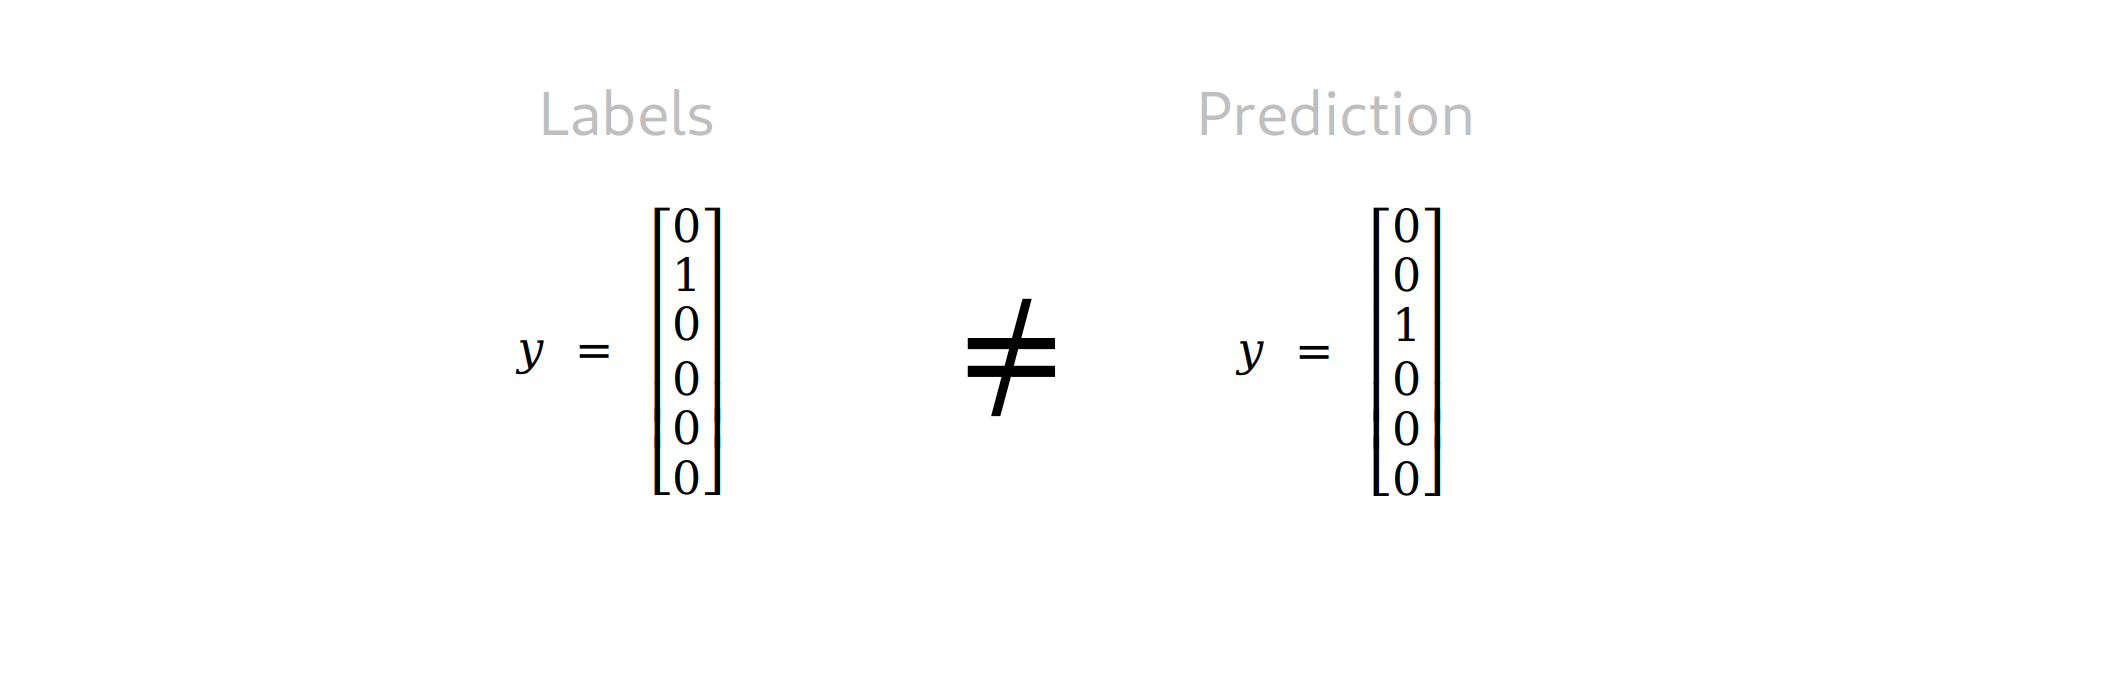

However, when dealing with multi-task classification, we are trying to predict on several classes independently. In this case, Accuracy metric works very poorly. Heres a figure explaining why:

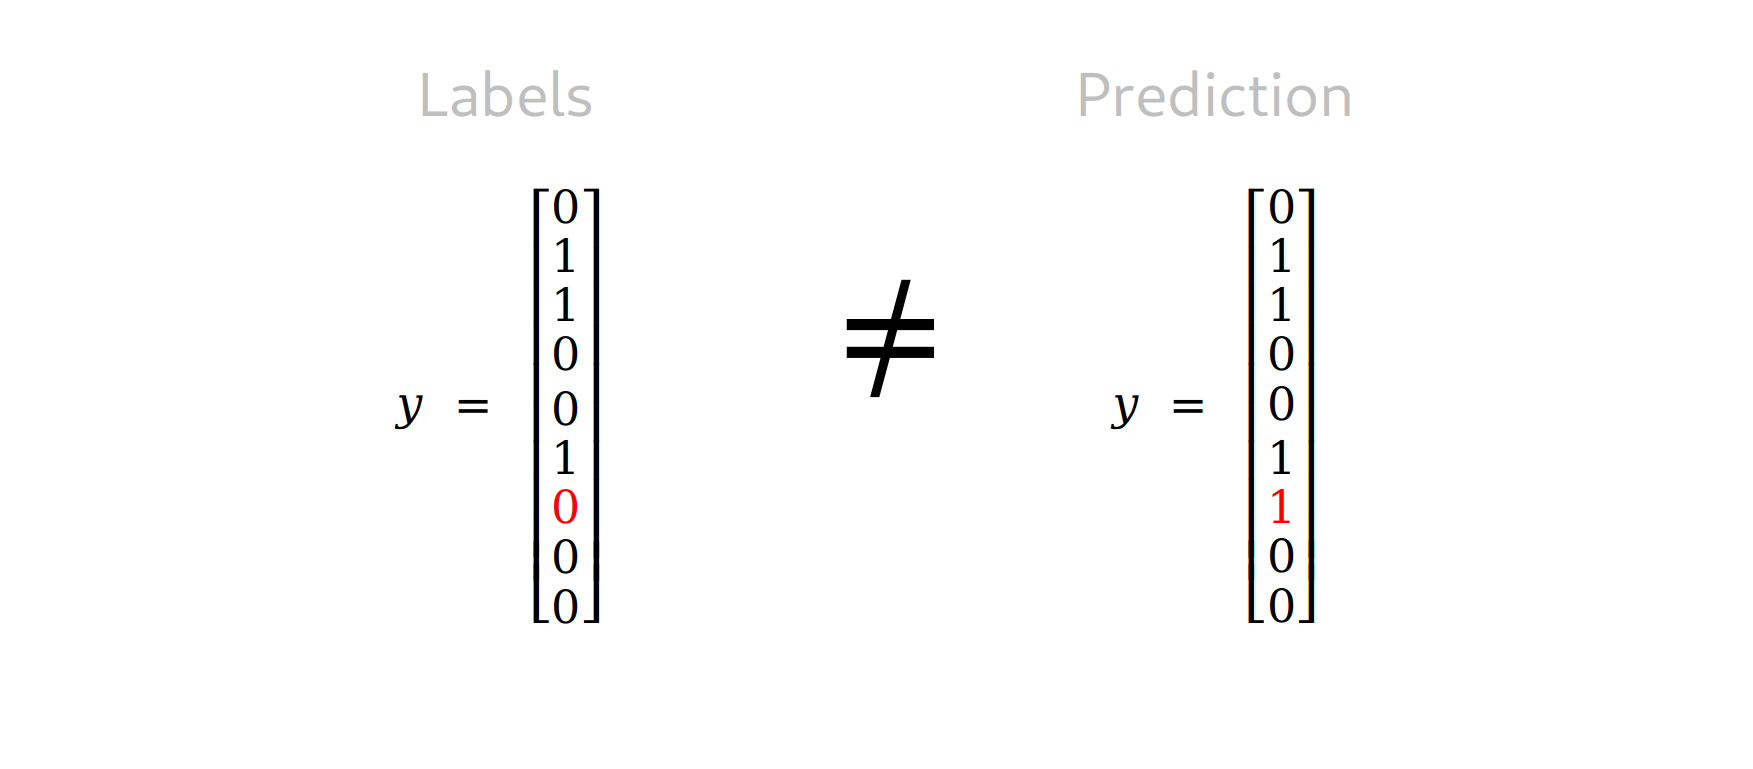

Suppose this is from a multi-task classifier used to detect ingredients in candies. Notice how for 8 classes the classifier predicted the output correctly. However, because of one mistake, the entire example is marked wrong. This is why in multi-task classification, we actually need to find the accuracies of the individual classes.

In [30]:
def multi_task_acc(Y_true, Y_pred):
    """ Calculates the Accuracy for each class
    Args:
        Y_true: np.ndarray containing class labels. shape = (num_examples x num_classes)
        Y_pred: np.ndarray containing predicted outputs. shape same as Y_true
        
    Returns:
        df: pd.DataFrame with the columns being the string name of each class, 
            and the index containing the accuracy
    """
    
    # diff will contain 0 if elements are the same, 1 if different
    diff = np.absolute(Y_true - Y_pred)

    # calculates how many errors are in each class
    sum_down = np.sum(diff, axis=0).astype(float)
    num_of_items = float(Y_true.shape[0])
    
    # Calculates accuracies
    accuracies = (1-(sum_down/num_of_items)).reshape(1, -1)
    df = pd.DataFrame(accuracies, columns=dataset.columns[1:10], index=["accuracy"])
    return df
    
multi_task_acc(Y_test, Y_pred)

chocolate    fruity   caramel  peanutyalmondy    nougat  \
accuracy   0.772727  0.681818  0.909091        0.818182  0.954545   

          crispedricewafer      hard       bar  pluribus  
accuracy          0.954545  0.863636  0.772727  0.590909

By calculating the accuracies of each individual class, we are able to obtain more reasonable results. Next up, lets also calculate the F1 scores of each class

### Other Metrics <a name="other"></a>

For a recap, the reason why we use F1 score is because **accuracy only tells us how many predictions we got right, however it does not account for imbalanced classes**, whereas **precision** and **recall** excels with datasets with large number of negative labels. F1 score is a combination of precision and recall, and thus this metric is often used **alongside** accuracy to give us a better sense of how well the Neural Network is actually doing.

In [31]:
from sklearn.metrics import f1_score

def multi_task_f1(Y_true, Y_pred):
    """ Calculates the F1 score for each class
    Args:
        Y_true: np.ndarray containing class labels. shape = (num_examples x num_classes)
        Y_pred: np.ndarray containing predicted outputs. shape same as Y_true
        
    Returns:
        df: pd.DataFrame with the columns being the string name of each class, 
            and the index containing the accuracy
    """
    fscores = []
    # Loops over the classes to calculate F1 for each class
    for i in range(Y_true.shape[1]):
        # must flatten, as it is requred for fscores()
        yt = Y_true[:, i].flatten()
        yp = Y_pred[:, i].flatten()
        fscores.append(f1_score(yt, yp))
    fscores = np.array(fscores).reshape(1, -1)
    df = pd.DataFrame(fscores, columns=dataset.columns[1:10], index=["f1"])
    return df
    
    
multi_task_f1(Y_test, Y_pred)
    

chocolate    fruity  caramel  peanutyalmondy  nougat  crispedricewafer  \
f1   0.705882  0.695652      0.0             0.0     0.0               0.0   

    hard       bar  pluribus  
f1   0.0  0.545455  0.666667

When we display the F1 scores for each class, we notice many classes have an **F1 score of 0**. So far, we have seen the accuracy metric as well as the F1 score metric, and currently it's still not giving us a clue on how well the Neural Network really is doing. Maybe visualizing the confusion matrices might give us some clues.

To plot the confusion matrices, we will use `SeaBorn`'s `heatmap` method. Because this is a multi-task classification task, we are going to **plot individual confusion matrices for each task**.

['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']


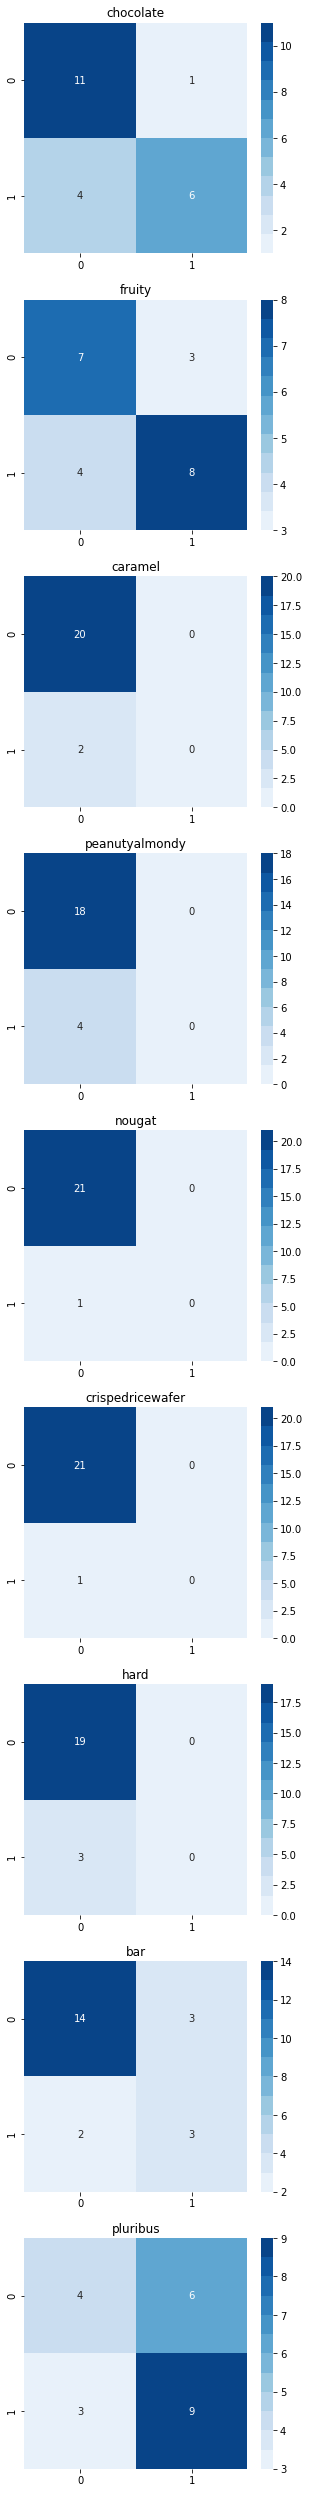

In [32]:
from sklearn.metrics import multilabel_confusion_matrix

# Contains the class names
classlst = list(dataset.columns.values[1:10])
print(classlst)

# calculates the multi-label confusion matrix for our classifier
conf_mats = multilabel_confusion_matrix(Y_test, Y_pred)

# Creates subplots using matplotlib
fig, axes = plt.subplots(conf_mats.shape[0], 1, figsize=(5, 45))

# Looping through every class
for i in range(conf_mats.shape[0]):
    sn.heatmap(conf_mats[i],ax=axes[i], annot=True, cmap=sn.color_palette("Blues",12))
    axes[i].set_title(classlst[i])

### Conclusions <a name="conclusions"></a>

Overall, after examining the confusion matrices as well as our accuracy and F1 matrics, we can conclude that this neural network performs rather poorly in some tasks, whereas in other tasks, notably on predicting the existance of **chocolate**, the Neural Network performs quite good. In the end, you chose to deploy your Neural Network for **Skootles**. The product developemnt team used the values of **90%** popularity and **10%** relative cost as inputs to the network:

In [33]:
X_in = scaler.transform(poly.transform(np.array([[0.1, 90]])))

Y_out = model.predict(X_in).reshape(1, -1)

prediction_df = pd.DataFrame(Y_out, columns=dataset.columns[1:10], index=["Prediction"])
prediction_df

chocolate  fruity  caramel  peanutyalmondy  nougat  \
Prediction          0       0        0               0       0   

            crispedricewafer  hard  bar  pluribus  
Prediction                 0     0    0         1

#### Question for Students:

What might be the reason for the poor performance of this Neural Network?
___

## $\mathcal{Fin}$ <a name="fin"></a>

Congrats on reaching the end of this notebook! Hope you have understood the inner workings of Neural Networks, as well as their applications. Up next, we are going to explore Neural Networks using the powerful tools provided in PyTorch. Stay Tuned....

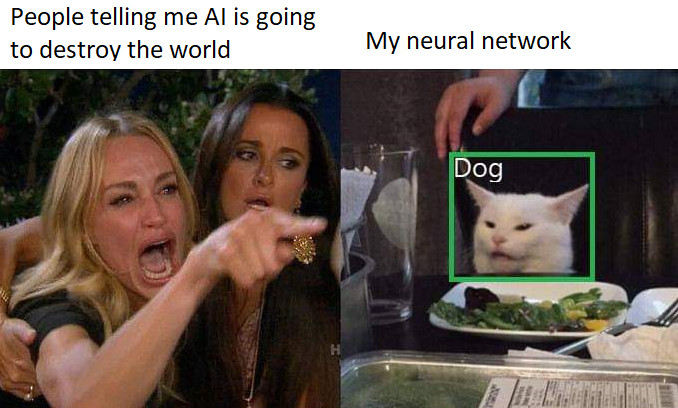